In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Heart Disease.csv')
dataset = pd.DataFrame(dataset)
print(dataset.shape)
dataset

(4238, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,HeartDisease
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  HeartDisease     4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
print(dataset.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
HeartDisease         0
dtype: int64


In [5]:
unique_values = dataset['BPMeds'].unique()
print(unique_values)
missing_values = dataset['BPMeds'].isnull().sum()
print(f"Missing values in BPMeds: {missing_values}")


[ 0.  1. nan]
Missing values in BPMeds: 53


As observed from the above information :- 
'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose' have null values. 

Out of these, 'BPMeds' feature has categorical value, either 0 or 1, others have floating numerical values. 

For categorical value, replace it with the mode of the feature's values & for the numerical value, replace it with the mean of the feature's values.


In [6]:
# Filling missing values for categorical feature 'BPMeds' with mode
dataset['BPMeds'].fillna(dataset['BPMeds'].mode()[0], inplace=True)

# Filling missing values for numerical features with mean
numerical_features = ['education', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

for feature in numerical_features:
    dataset[feature].fillna(dataset[feature].mean(), inplace=True)

# Verify if there are any missing values left
print(dataset.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
HeartDisease       0
dtype: int64


In [7]:
# Count the occurrences of heart disease (1) and non-heart disease (0)
heart_disease_counts = dataset['HeartDisease'].value_counts()

# Calculate the percentage of heart disease (1) and non-heart disease (0) cases
heart_disease_percentage = (heart_disease_counts[1] / len(dataset)) * 100
non_heart_disease_percentage = (heart_disease_counts[0] / len(dataset)) * 100

print("Heart Disease percentage:", heart_disease_percentage)
print("No Heart Disease percentage:", non_heart_disease_percentage)
heart_disease_counts

Heart Disease percentage: 15.19584709768759
No Heart Disease percentage: 84.80415290231241


HeartDisease
0    3594
1     644
Name: count, dtype: int64

In [8]:
# Split data into features and target variable
X = dataset.drop(columns=['HeartDisease'])  # Features
Y = dataset['HeartDisease']  # Target

In [9]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753


In [10]:
print(Y)
Y.value_counts()

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: HeartDisease, Length: 4238, dtype: int64


HeartDisease
0    3594
1     644
Name: count, dtype: int64

In [11]:
# Split into train, test, and validation sets (70:15:15)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.50, stratify=Y_temp, random_state=42)

In [12]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(2966, 15) (2966,)
(636, 15) (636,)
(636, 15) (636,)


In [13]:
print(type(X_train), type(Y_train))
print(type(X_val), type(Y_val))
print(type(X_test), type(Y_test))
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_val = X_val.to_numpy()
Y_val = Y_val.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
print(type(X_train), type(Y_train))
print(type(X_val), type(Y_val))
print(type(X_test), type(Y_test))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<h3 align='center'>Part (a)</h3>

In [14]:
# Sigmoid function (here x can be numerical value or np array too)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Cost Function - Cross Entropy Loss
def computeCostFunc(X, Y, w, b): 
    m, n = X.shape
    z = np.dot(X, w) + b
    f_x = sigmoid(z)
    cost = -1/m * np.sum(Y * np.log(f_x) + (1 - Y) * np.log(1 - f_x))
    return cost

# Gradient Function
def computeGradient(X, Y, w, b):
    m, n = X.shape
    z = np.dot(X, w) + b
    f_x = sigmoid(z)

    dj_dw = 1/m * np.dot(X.T, (f_x - Y))
    dj_db = 1/m * np.sum(f_x - Y)   
               
    return dj_db, dj_dw

# Predict Function
def predict(X, Y, w, b):
    m, n = X.shape
    Y_pred = np.zeros(m)
    Z = np.dot(X, w) + b
    Y_pred_prob = sigmoid(Z)
    Y_pred = sigmoid(Z) >= 0.5 
    
    accuracy = np.mean(Y_pred == Y)*100
    return accuracy, Y_pred, Y_pred_prob


In [15]:
m, n = X_train.shape

w = np.zeros(n)
b = 0.

cost = computeCostFunc(X_train, Y_train, w, b)
print(f'Cross Entropy Cost initially: {cost:.3f}')

dj_db, dj_dw = computeGradient(X_train, Y_train, w, b)
print(f'dj_db initially: {dj_db}' )
print(f'dj_dw initially: {dj_dw.tolist()}' )

accu, pred, pred_prob = predict(X, Y, w, b)
print(f'Accuracy initially: {accu:.3f}%')

Cross Entropy Cost initially: 0.693
dj_db initially: 0.34794335805799054
dj_dw initially: [0.13722184760620365, 16.535064059339177, 0.708022521229797, 0.16689143627781525, 2.8368271550527426, 0.0038772757923128793, 0.0, 0.0770397842211733, 0.004045853000674309, 80.71632956055286, 44.21805461901551, 28.15222521915037, 8.881273428396126, 26.318294180079768, 27.619153523482595]
Accuracy initially: 15.196%


In [16]:
# Logistic Regression using Batch Gradient Descent - Updates parameteres by taking epochs gradient steps with learning rate alpha
def batchGradientDescent(X, Y, X_val, Y_val, w, b, alpha, epochs):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []

    for i in range(epochs):
        cost = computeCostFunc(X, Y, w, b)
        accuracy, prediction, prediction_prob = predict(X, Y, w, b)
        val_cost = computeCostFunc(X_val, Y_val, w, b)
        val_accuracy, val_pred, val_pred_prob = predict(X_val, Y_val, w, b)
        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        dj_db, dj_dw = computeGradient(X, Y, w, b)   

        # Update Parameters using w, b, alpha and gradient (Simultaneous Updates)
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db    

        if (i%1000 == 0):
            print(f"Iteration {i}: Cost {float(J_history[-1])}, Accuracy: {accuracy:.2f}%")       

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history 


In [17]:
# List of learning rates to try
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
epochs = 10000

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescent(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 0.01
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost nan, Accuracy: 84.79%
Iteration 2000: Cost nan, Accuracy: 34.90%
Iteration 3000: Cost nan, Accuracy: 83.99%
Iteration 4000: Cost 53.520649192847806, Accuracy: 84.79%
Iteration 5000: Cost 38.736586365566616, Accuracy: 84.79%
Iteration 6000: Cost 35.43572823583886, Accuracy: 84.79%
Iteration 7000: Cost 42.16547392792813, Accuracy: 84.79%
Iteration 8000: Cost nan, Accuracy: 84.79%
Iteration 9000: Cost 50.6449654969479, Accuracy: 84.79%
Running gradient descent for learning rate: 0.001
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 2.0637727511312156, Accuracy: 84.83%
Iteration 2000: Cost 0.6990072791011867, Accuracy: 77.51%
Iteration 3000: Cost 4.047993982131081, Accuracy: 20.40%
Iteration 4000: Cost 1.4471217434000871, Accuracy: 84.86%
Iteration 5000: Cost 5.9668606573171035, Accuracy: 84.79%
Iteration 6000: Cost 4.92204604619975, Accur

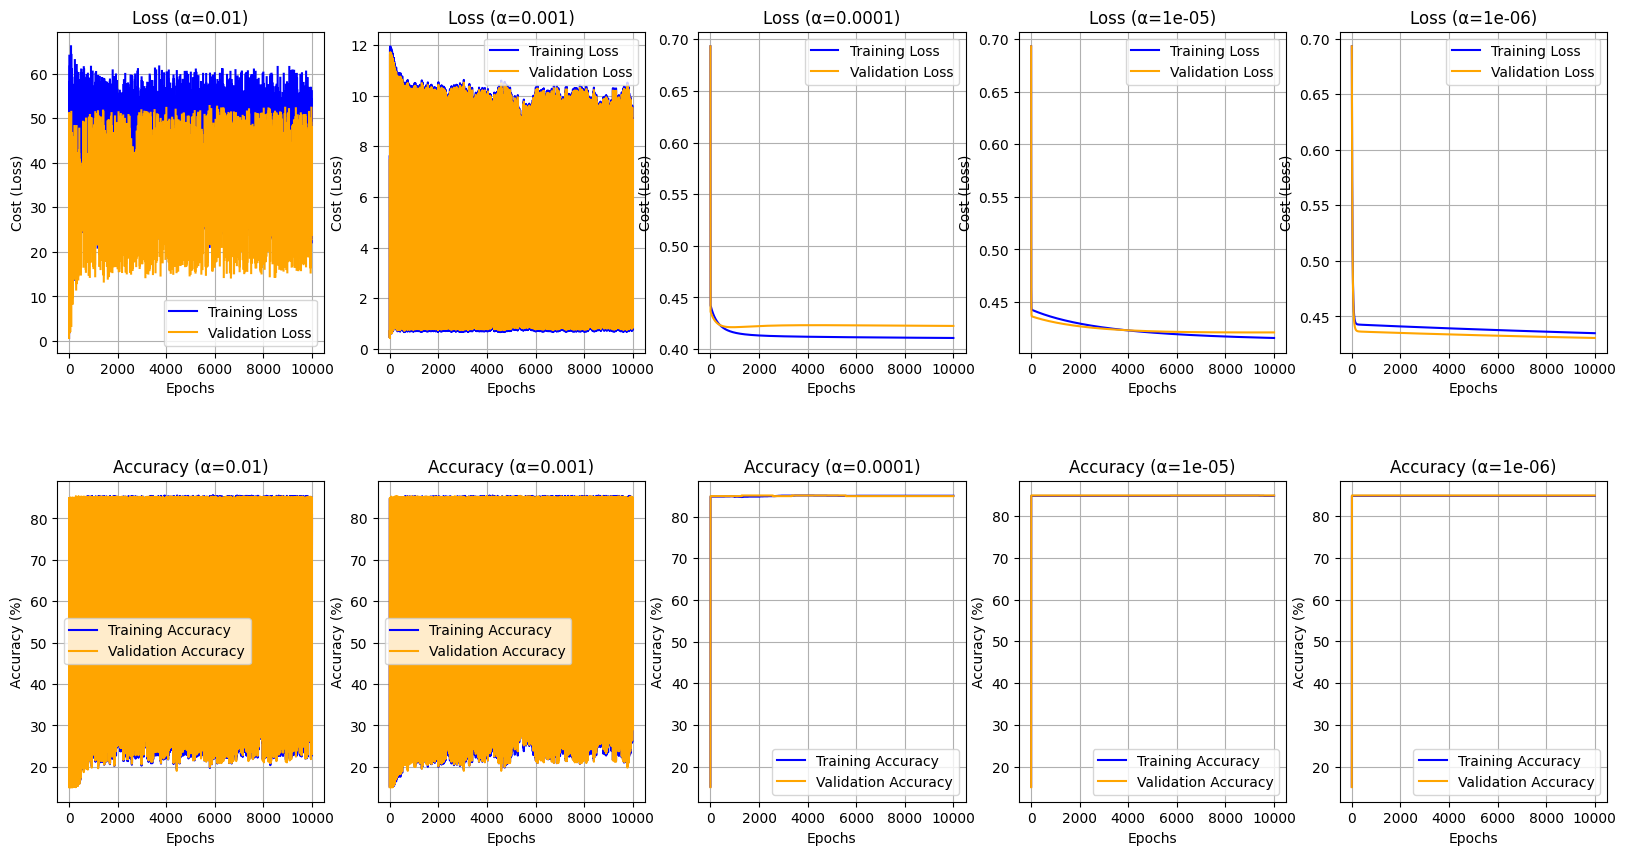

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    # Plot loss in the top row
    axes[0, idx].plot(range(epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()

In [21]:
# Gradient Descent hyperparameters
epochs = 10000
alpha = 0.0001

J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescent(
    X_train, Y_train, X_val, Y_val, w, b, alpha, epochs)

# print(J_history)
# print(w_history)
# print(b_history)

Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.41588035229096626, Accuracy: 84.83%
Iteration 2000: Cost 0.4131524422011928, Accuracy: 84.79%
Iteration 3000: Cost 0.41233744940406697, Accuracy: 85.03%
Iteration 4000: Cost 0.41191967743499097, Accuracy: 85.06%
Iteration 5000: Cost 0.4116296530657802, Accuracy: 85.00%
Iteration 6000: Cost 0.4113986372964501, Accuracy: 84.96%
Iteration 7000: Cost 0.41120254624149727, Accuracy: 85.00%
Iteration 8000: Cost 0.4110297908594218, Accuracy: 85.00%
Iteration 9000: Cost 0.4108734887606743, Accuracy: 85.00%


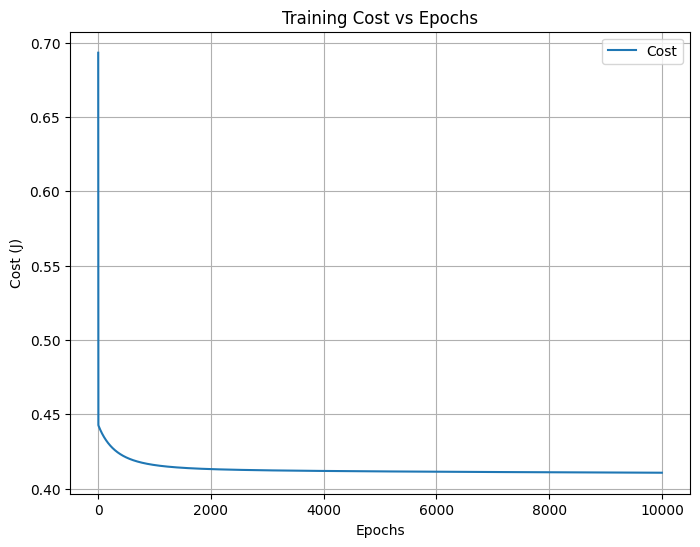

In [22]:
plt.figure(figsize=(8,6))
plt.plot(range(epochs), J_history, label='Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Training Cost vs Epochs')
plt.grid(True)
plt.legend()
plt.show()

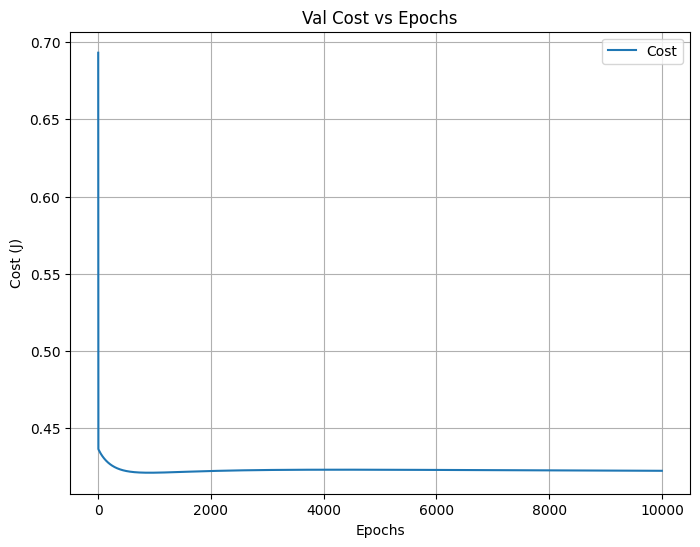

In [23]:
plt.figure(figsize=(8,6))
plt.plot(range(epochs), J_val_history, label='Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Val Cost vs Epochs')
plt.grid(True)
plt.legend()
plt.show()

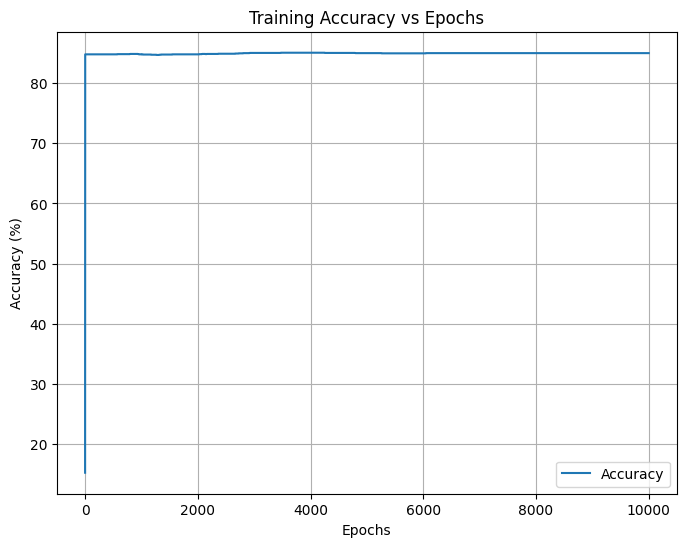

In [24]:
plt.figure(figsize=(8,6))
plt.plot(range(epochs), accuracy_history, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy vs Epochs')
plt.grid(True)
plt.legend()
plt.show()

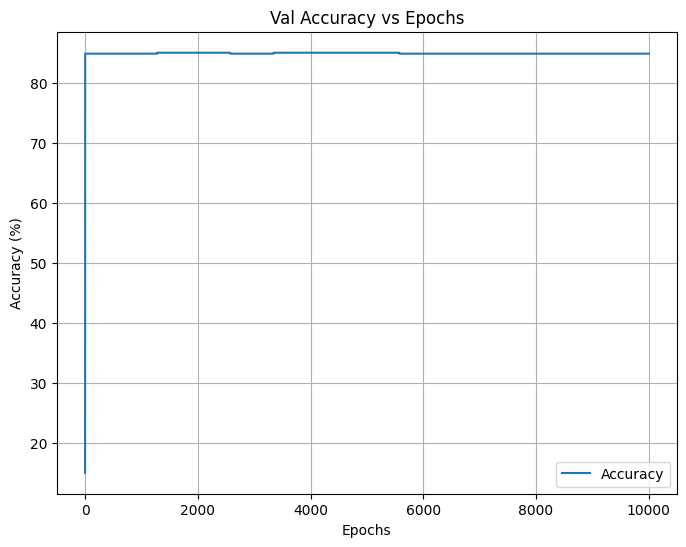

In [25]:
plt.figure(figsize=(8,6))
plt.plot(range(epochs), accuracy_val_history, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Val Accuracy vs Epochs')
plt.grid(True)
plt.legend()
plt.show()

<h3 align='center'>Part (b)</h3>

In [26]:
# Applying MinMax Scaling 
X_scaled = (X-X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X = X_scaled
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,0.473684,0.000000,1.0,0.014286,0.0,0.0,1.0,0.0,0.349745,0.451537,0.465608,0.252787,0.222222,0.129944
4234,1.0,0.500000,0.666667,1.0,0.614286,0.0,0.0,0.0,0.0,0.169779,0.203310,0.338624,0.101066,0.212121,0.079096
4235,0.0,0.421053,0.333333,1.0,0.285714,0.0,0.0,0.0,0.0,0.239389,0.224586,0.253968,0.156568,0.404040,0.129944
4236,0.0,0.315789,0.000000,1.0,0.214286,0.0,0.0,0.0,0.0,0.174873,0.203310,0.412698,0.087736,0.424242,0.118550


In [27]:
# Split into train, test, and validation sets (70:15:15)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.50, stratify=Y_temp, random_state=42)

In [28]:
print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(2966, 15) (2966,)
(636, 15) (636,)
(636, 15) (636,)


In [29]:
print(type(X), type(Y))
print(type(X_train), type(Y_train))
print(type(X_val), type(Y_val))
print(type(X_test), type(Y_test))
X = X.to_numpy()
Y = Y.to_numpy()
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_val = X_val.to_numpy()
Y_val = Y_val.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
print(type(X), type(Y))
print(type(X_train), type(Y_train))
print(type(X_val), type(Y_val))
print(type(X_test), type(Y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [30]:
# Logistic Regression after Min-Max Scaling
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescent(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 6.42026002763912, Accuracy: 84.86%
Iteration 2000: Cost nan, Accuracy: 71.41%
Iteration 3000: Cost 5.629447813113776, Accuracy: 84.86%
Iteration 4000: Cost 13.848766443106536, Accuracy: 84.79%
Iteration 5000: Cost 15.036398250374033, Accuracy: 84.79%
Iteration 6000: Cost nan, Accuracy: 61.16%
Iteration 7000: Cost 4.3780716563631925, Accuracy: 85.17%
Iteration 8000: Cost 15.05383202158051, Accuracy: 84.79%
Iteration 9000: Cost nan, Accuracy: 84.86%
Running gradient descent for learning rate: 1
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.3752386875103287, Accuracy: 85.60%
Iteration 2000: Cost 0.37355545398001294, Accuracy: 85.84%
Iteration 3000: Cost 0.3731177005732249, Accuracy: 85.81%
Iteration 4000: Cost 0.3729479071277686, Accuracy: 85.84%
Iteration 5000: Cost 0.3728742918019398, Accuracy: 85.70%
Iteration 6000: Cost 0.372841011

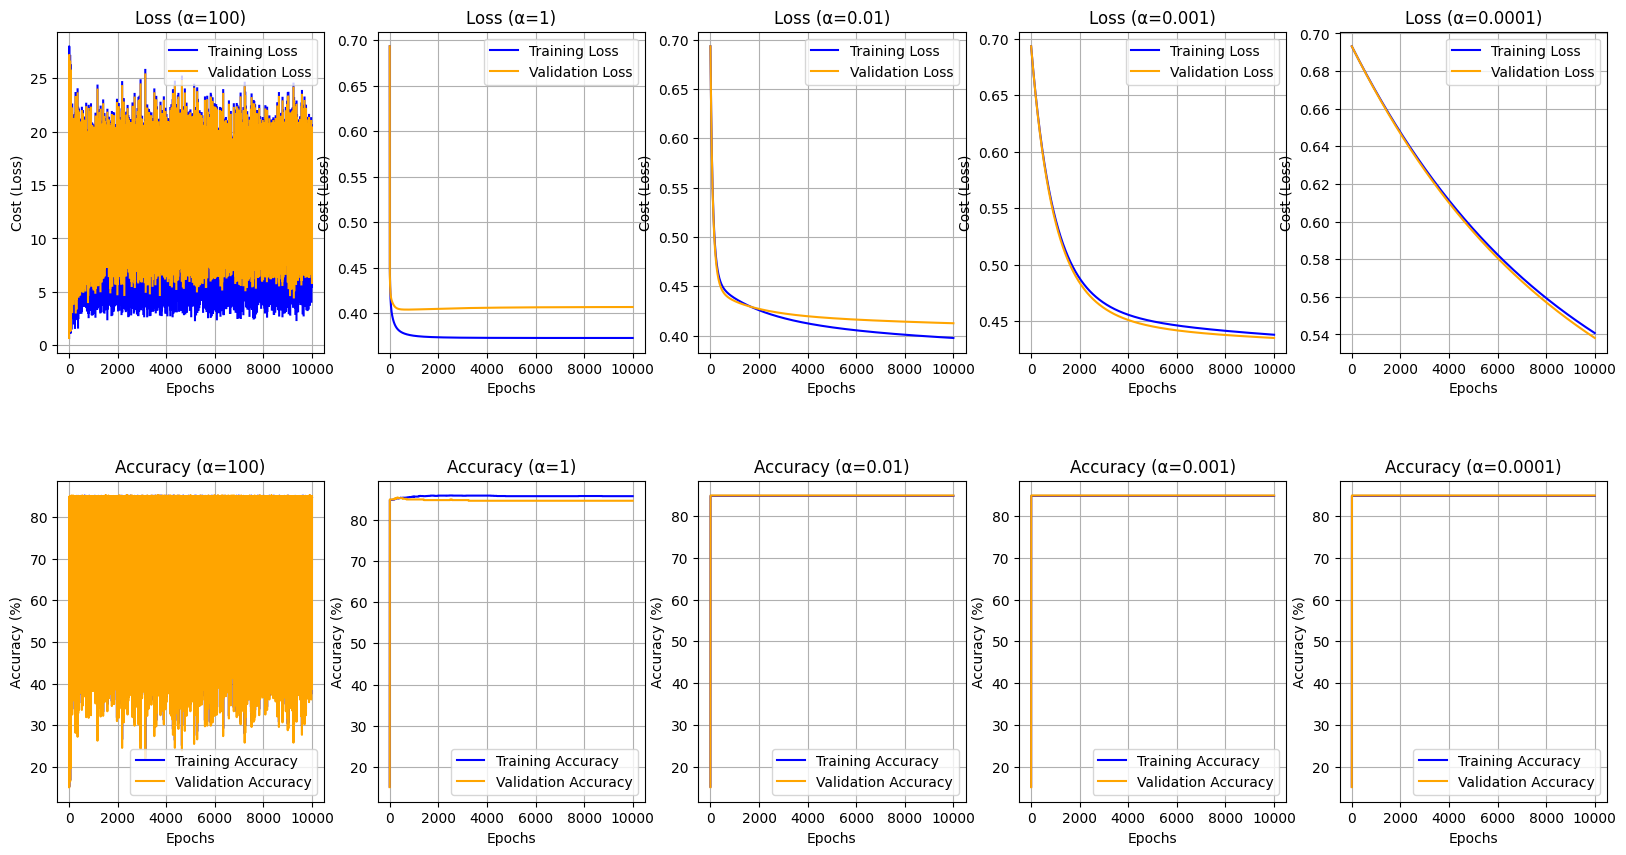

In [31]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    # Plot loss in the top row
    axes[0, idx].plot(range(epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()

<h3 align='center'>Part (c)</h3>

In [34]:
# Gradient Descent hyperparameters
epochs = 100000
alpha = 0.01

J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescent(
    X_train, Y_train, X_val, Y_val, w, b, alpha, epochs)

# print(J_history)
# print(w_history)
# print(b_history)

Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.43785400167898525, Accuracy: 84.79%
Iteration 2000: Cost 0.4257229008941591, Accuracy: 84.79%
Iteration 3000: Cost 0.4178136372847071, Accuracy: 84.79%
Iteration 4000: Cost 0.4123535157740921, Accuracy: 84.79%
Iteration 5000: Cost 0.40837974809939537, Accuracy: 84.79%
Iteration 6000: Cost 0.4053351319670419, Accuracy: 84.79%
Iteration 7000: Cost 0.4028932468380322, Accuracy: 84.79%
Iteration 8000: Cost 0.40085903527442135, Accuracy: 84.79%
Iteration 9000: Cost 0.399113117399796, Accuracy: 84.79%
Iteration 10000: Cost 0.3975804382402143, Accuracy: 84.79%
Iteration 11000: Cost 0.39621237917364804, Accuracy: 84.83%
Iteration 12000: Cost 0.3949763869794666, Accuracy: 84.83%
Iteration 13000: Cost 0.3938498626705339, Accuracy: 84.83%
Iteration 14000: Cost 0.39281650386793265, Accuracy: 84.83%
Iteration 15000: Cost 0.39186408308991716, Accuracy: 84.86%
Iteration 16000: Cost 0.39098307884513755, Accuracy: 84.90%
Iter

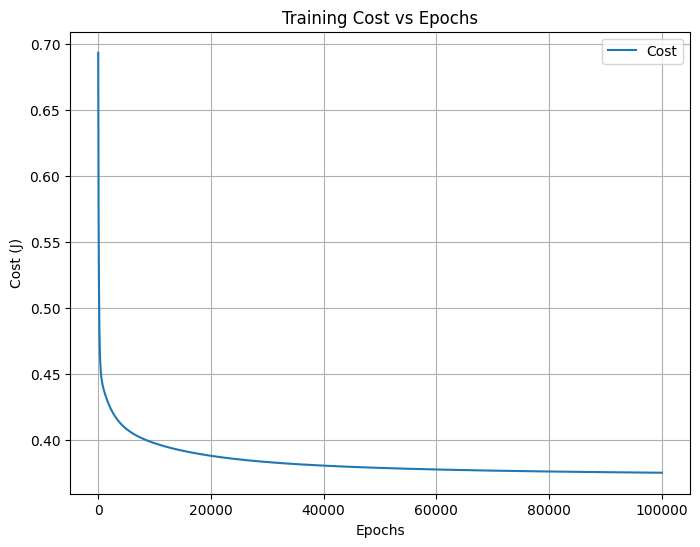

In [35]:
plt.figure(figsize=(8,6))
plt.plot(range(epochs), J_history, label='Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Training Cost vs Epochs')
plt.grid(True)
plt.legend()
plt.show()

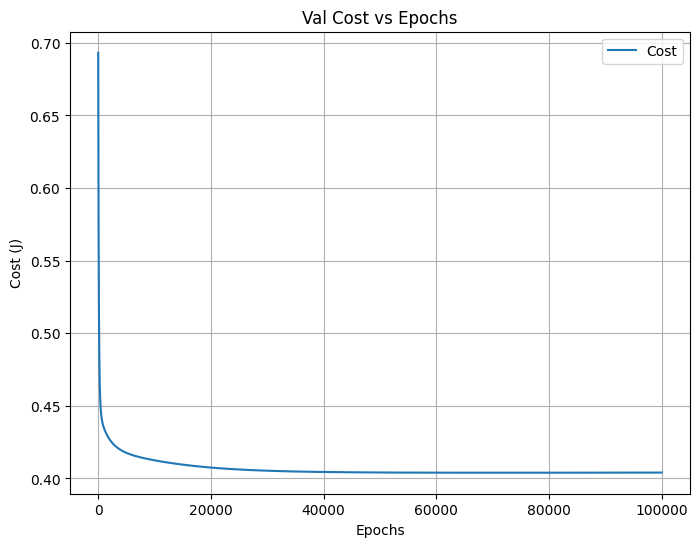

In [36]:
plt.figure(figsize=(8,6))
plt.plot(range(epochs), J_val_history, label='Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost (J)')
plt.title('Val Cost vs Epochs')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
final_w = w_history[-1]
final_b = b_history[-1]
# print(final_w)
# print(final_b)

valAccuracy, Y_val_pred, Y_val_pred_prob = predict(X_val, Y_val, final_w, final_b)
print(f'Accuracy at final w and b : {valAccuracy:.3f}%')


Accuracy at final w and b : 84.906%


Confusion Matrix:
[[536   4]
 [ 92   4]]


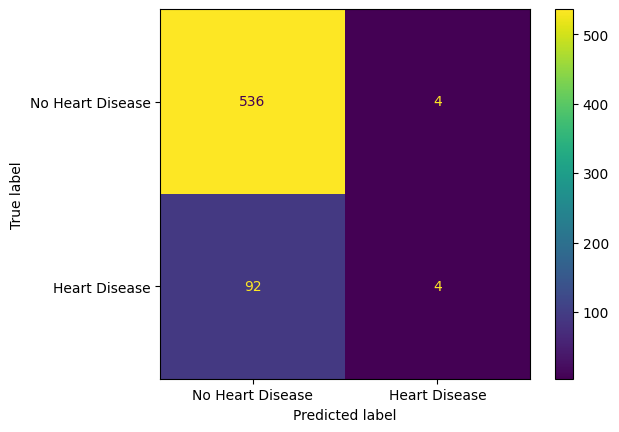

Precision: 0.5000
Recall: 0.0417
F1 Score: 0.0769
ROC-AUC Score: 0.6686


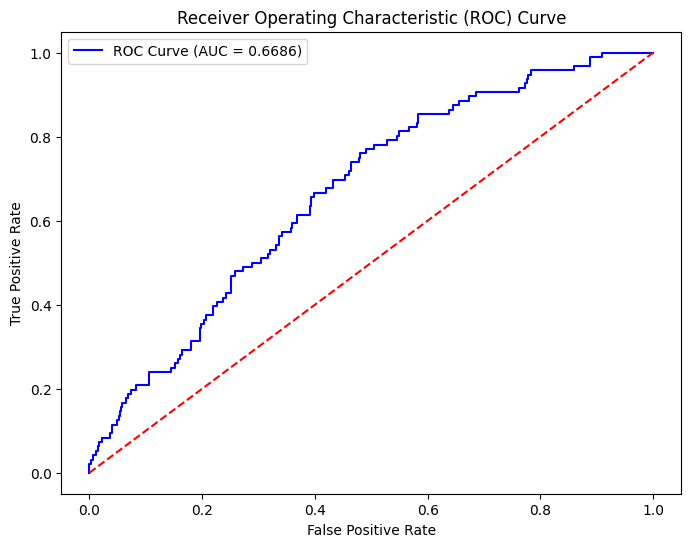

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# 1. Confusion Matrix
cm = confusion_matrix(Y_val, Y_val_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
cm_display = ConfusionMatrixDisplay(cm, display_labels = ["No Heart Disease", "Heart Disease"])
cm_display.plot()
plt.show()

# 2. Precision
precision = precision_score(Y_val, Y_val_pred)
print(f"Precision: {precision:.4f}")

# 3. Recall
recall = recall_score(Y_val, Y_val_pred)
print(f"Recall: {recall:.4f}")

# 4. F1 Score
f1 = f1_score(Y_val, Y_val_pred)
print(f"F1 Score: {f1:.4f}")

# 5. ROC-AUC Score
roc_auc = roc_auc_score(Y_val, Y_val_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_val, Y_val_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<h3 align='center'>Part (d)</h3>

In [39]:
# Logistic Regression using Batch Gradient Descent - Updates parameteres by taking epochs gradient steps with learning rate alpha
def batchGradientDescent(X, Y, X_val, Y_val, X_test, Y_test, w, b, alpha, epochs):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    J_test_history = []
    accuracy_test_history = []

    for i in range(epochs):
        cost = computeCostFunc(X, Y, w, b)
        accuracy, prediction, prediction_prob = predict(X, Y, w, b)
        val_cost = computeCostFunc(X_val, Y_val, w, b)
        val_accuracy, val_pred, val_pred_prob = predict(X_val, Y_val, w, b)
        test_cost = computeCostFunc(X_val, Y_val, w, b)
        test_accuracy, test_pred, test_pred_prob = predict(X_test, Y_test, w, b)
        J_history.append(cost)
        J_val_history.append(val_cost)
        J_test_history.append(test_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)
        accuracy_test_history.append(test_accuracy)

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = computeGradient(X, Y, w, b)   

        # Update Parameters using w, b, alpha and gradient (Simultaneous Updates)
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db    

        if (i%1000 == 0):
            print(f"Iteration {i}: Cost {float(J_history[-1])}, Accuracy: {accuracy:.2f}%")       

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history, J_test_history, accuracy_test_history # return w and J,w history for graphing


In [40]:
# List of learning rates to try
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
epochs = 10000

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history, J_test_history, accuracy_test_history = batchGradientDescent(
        X_train, Y_train, X_val, Y_val, X_test, Y_test, w, b, alpha, epochs)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "J_test": J_test_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history,
        "accuracy_test": accuracy_test_history
    }


Running gradient descent for learning rate: 0.01
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.43785400167898525, Accuracy: 84.79%
Iteration 2000: Cost 0.4257229008941591, Accuracy: 84.79%
Iteration 3000: Cost 0.4178136372847071, Accuracy: 84.79%
Iteration 4000: Cost 0.4123535157740921, Accuracy: 84.79%
Iteration 5000: Cost 0.40837974809939537, Accuracy: 84.79%
Iteration 6000: Cost 0.4053351319670419, Accuracy: 84.79%
Iteration 7000: Cost 0.4028932468380322, Accuracy: 84.79%
Iteration 8000: Cost 0.40085903527442135, Accuracy: 84.79%
Iteration 9000: Cost 0.399113117399796, Accuracy: 84.79%
Running gradient descent for learning rate: 0.001
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.5406834042950502, Accuracy: 84.79%
Iteration 2000: Cost 0.4877004378329092, Accuracy: 84.79%
Iteration 3000: Cost 0.4659338328229449, Accuracy: 84.79%
Iteration 4000: Cost 0.4555091643397221, Accuracy: 84.79%
Iteration 5000: Cost 0.449744475664

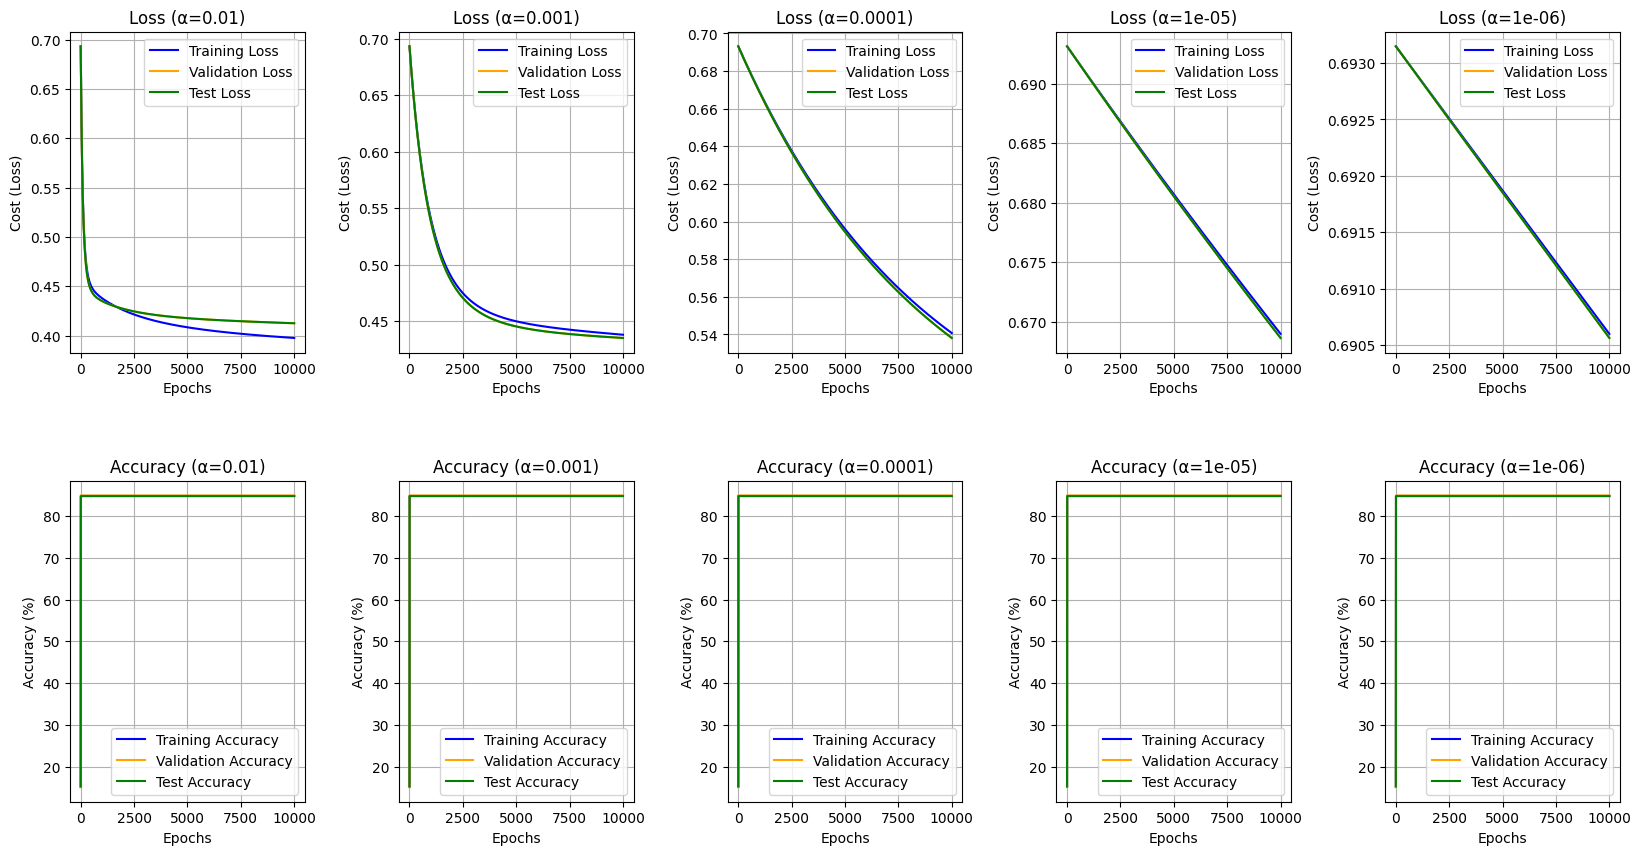

In [41]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    # Plot loss in the top row
    axes[0, idx].plot(range(epochs), results[alpha]["J_train"], label='Training Loss', color='blue')
    axes[0, idx].plot(range(epochs), results[alpha]["J_val"], label='Validation Loss', color='orange')
    axes[0, idx].plot(range(epochs), results[alpha]["J_test"], label='Test Loss', color='green')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_train"], label='Training Accuracy', color='blue')
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_val"], label='Validation Accuracy', color='orange')
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_test"], label='Test Accuracy', color='green')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()


In [42]:
# Logistic Regression using Stochastic Gradient Descent 
def stochasticGradientDescent(X, Y, X_val, Y_val, X_test, Y_test, w, b, alpha, epochs):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    J_test_history = []
    accuracy_test_history = []

    for i in range(epochs):
        cost = computeCostFunc(X, Y, w, b)
        accuracy, prediction, prediction_prob = predict(X, Y, w, b)
        val_cost = computeCostFunc(X_val, Y_val, w, b)
        val_accuracy, val_pred, val_pred_prob = predict(X_val, Y_val, w, b)
        test_cost = computeCostFunc(X_val, Y_val, w, b)
        test_accuracy, test_pred, test_pred_prob = predict(X_test, Y_test, w, b)
        J_history.append(cost)
        J_val_history.append(val_cost)
        J_test_history.append(test_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)
        accuracy_test_history.append(test_accuracy)

        # Shuffling data at each epoch for more robust SGD
        perm = np.random.permutation(m)
        X_shuffled = X[perm]
        Y_shuffled = Y[perm]

        # Calculate the gradient and update the parameters based on each traning sample
        for sample in range(m):
            x_i = X_shuffled[sample:sample+1]
            y_i = Y_shuffled[sample:sample+1]
            dj_db, dj_dw = computeGradient(x_i, y_i, w, b)
            w -= alpha * dj_dw
            b -= alpha * dj_db

        if (i%1000 == 0):
            print(f"Iteration {i}: Cost {float(J_history[-1])}, Accuracy: {accuracy:.2f}%")       
   

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history, J_test_history, accuracy_test_history # return w and J,w history for graphing


In [43]:
# Logistic Regression using Stochastic Gradient Descent
# List of learning rates to try
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
epochs = 10000

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the stochastic gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history, J_test_history, accuracy_test_history = stochasticGradientDescent(
        X_train, Y_train, X_val, Y_val, X_test, Y_test, w, b, alpha, epochs)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "J_test": J_test_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history,
        "accuracy_test": accuracy_test_history
    }


Running gradient descent for learning rate: 0.01
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.37317690687059246, Accuracy: 85.70%
Iteration 2000: Cost 0.37354887175392915, Accuracy: 85.70%
Iteration 3000: Cost 0.3728562009702448, Accuracy: 85.64%
Iteration 4000: Cost 0.37306398214974484, Accuracy: 85.67%
Iteration 5000: Cost 0.3730507384506986, Accuracy: 85.67%
Iteration 6000: Cost 0.3744612745113212, Accuracy: 85.54%
Iteration 7000: Cost 0.3730180275363777, Accuracy: 85.64%
Iteration 8000: Cost 0.3728709961177123, Accuracy: 85.67%
Iteration 9000: Cost 0.37323491452202884, Accuracy: 85.67%
Running gradient descent for learning rate: 0.001
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.37312788615897136, Accuracy: 85.84%
Iteration 2000: Cost 0.37284471270005065, Accuracy: 85.70%
Iteration 3000: Cost 0.3728187933351689, Accuracy: 85.70%
Iteration 4000: Cost 0.372825828577816, Accuracy: 85.70%
Iteration 5000: Cost 0.372812693

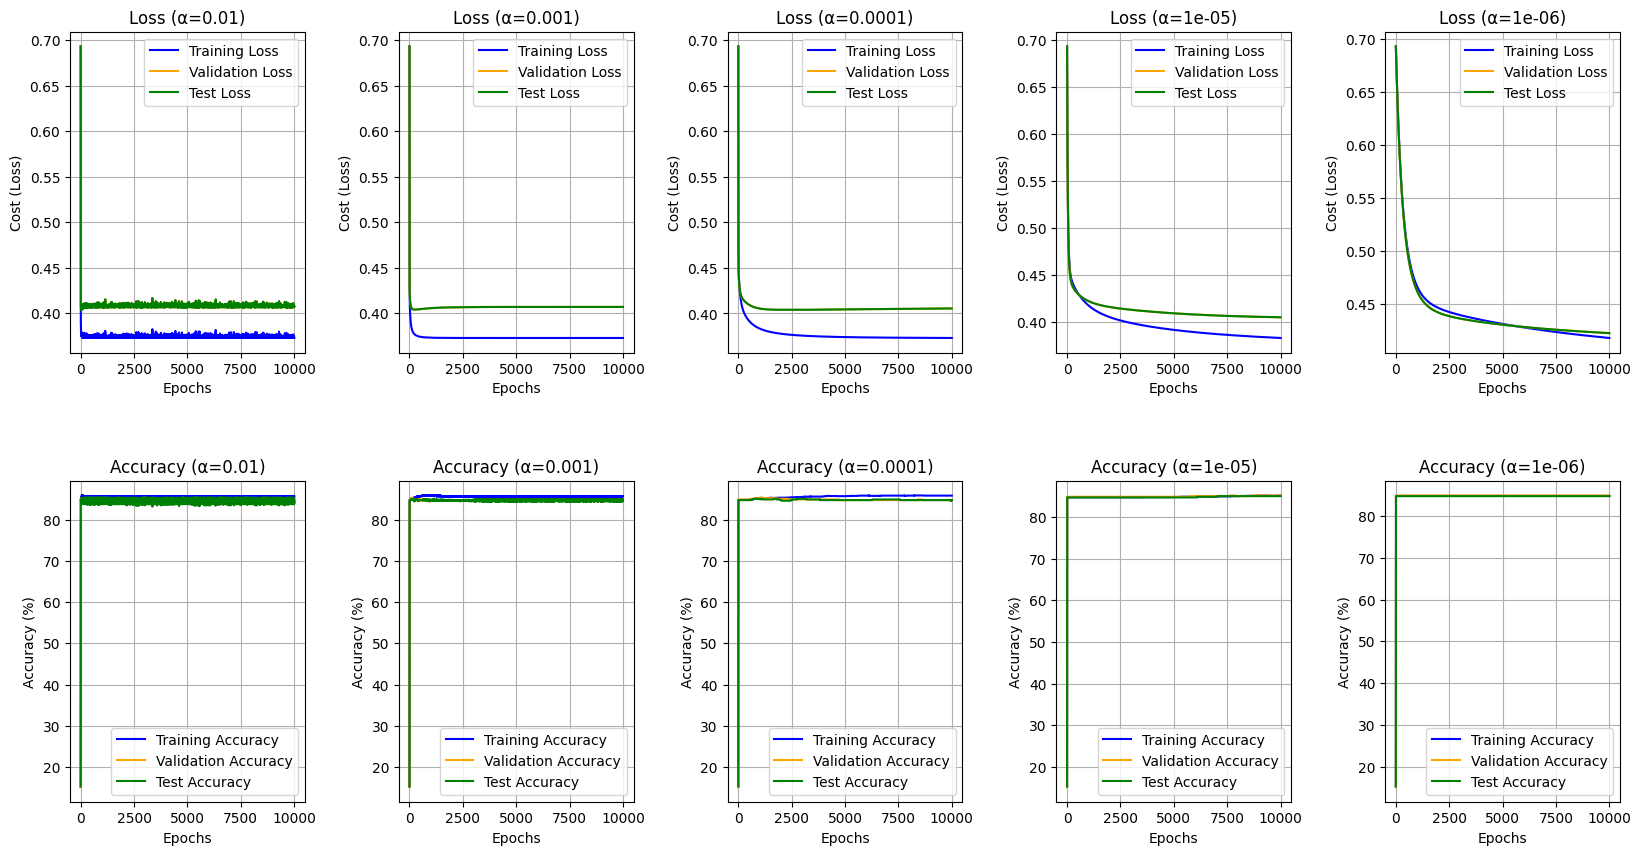

In [44]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    # Plot loss in the top row
    axes[0, idx].plot(range(epochs), results[alpha]["J_train"], label='Training Loss', color='blue')
    axes[0, idx].plot(range(epochs), results[alpha]["J_val"], label='Validation Loss', color='orange')
    axes[0, idx].plot(range(epochs), results[alpha]["J_test"], label='Test Loss', color='green')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_train"], label='Training Accuracy', color='blue')
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_val"], label='Validation Accuracy', color='orange')
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_test"], label='Test Accuracy', color='green')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()


In [45]:
# Logistic Regression using Mini-Batch Gradient Descent 
def miniBatchGradientDescent(X, Y, X_val, Y_val, X_test, Y_test, w, b, alpha, epochs, batch_size):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    J_test_history = []
    accuracy_test_history = []

    for i in range(epochs):
        cost = computeCostFunc(X, Y, w, b)
        accuracy, prediction, prediction_prob = predict(X, Y, w, b)
        val_cost = computeCostFunc(X_val, Y_val, w, b)
        val_accuracy, val_pred, val_pred_prob = predict(X_val, Y_val, w, b)
        test_cost = computeCostFunc(X_val, Y_val, w, b)
        test_accuracy, test_pred, test_pred_prob = predict(X_test, Y_test, w, b)
        J_history.append(cost)
        J_val_history.append(val_cost)
        J_test_history.append(test_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)
        accuracy_test_history.append(test_accuracy)

        # Shuffling data at each epoch for more robust MBGD
        perm = np.random.permutation(m)
        X_shuffled = X[perm]
        Y_shuffled = Y[perm]

        # Calculate the gradient and update the parameters based on each batch size       
        for sample in range(0, m, batch_size):
            X_batch = X_shuffled[sample:sample+batch_size]
            Y_batch = Y_shuffled[sample:sample+batch_size]
            dj_db, dj_dw = computeGradient(X_batch, Y_batch, w, b)
            w -= alpha * dj_dw               
            b -= alpha * dj_db    

        if (i%1000 == 0):
            print(f"Iteration {i}: Cost {float(J_history[-1])}, Accuracy: {accuracy:.2f}%")       

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history, J_test_history, accuracy_test_history # return w and J,w history for graphing


In [46]:
# Logistic Regression using Mini Batch Gradient Descent
# List of learning rates and batch sizes to try
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
batch_sizes = [32, 64, 128]
epochs = 10000

results = {}

for alpha in learning_rates:
    for batch_size in batch_sizes:
        w = np.zeros(n)
        b = 0.

        print(f"Running gradient descent for learning rate: {alpha}, Batch Size: {batch_size}")

        # Run the mini-batch gradient descent for this learning rate and batch size
        J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history, J_test_history, accuracy_test_history = miniBatchGradientDescent(
            X_train, Y_train, X_val, Y_val, X_test, Y_test, w, b, alpha, epochs, batch_size)

        results[(alpha, batch_size)] = {
            "J_train": J_history,
            "J_val": J_val_history,
            "J_test": J_test_history,
            "accuracy_train": accuracy_history,
            "accuracy_val": accuracy_val_history,
            "accuracy_test": accuracy_test_history
        }


Running gradient descent for learning rate: 0.1, Batch Size: 32
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.3728172126090808, Accuracy: 85.74%
Iteration 2000: Cost 0.3729981524260635, Accuracy: 85.64%
Iteration 3000: Cost 0.37281248668122285, Accuracy: 85.67%
Iteration 4000: Cost 0.3728125405337358, Accuracy: 85.67%
Iteration 5000: Cost 0.37337159739697373, Accuracy: 85.50%
Iteration 6000: Cost 0.3728982773434662, Accuracy: 85.67%
Iteration 7000: Cost 0.37298452123474957, Accuracy: 85.67%
Iteration 8000: Cost 0.3728259551882212, Accuracy: 85.70%
Iteration 9000: Cost 0.3728180374593568, Accuracy: 85.70%
Running gradient descent for learning rate: 0.1, Batch Size: 64
Iteration 0: Cost 0.6931471805599454, Accuracy: 15.21%
Iteration 1000: Cost 0.37292214749586367, Accuracy: 85.74%
Iteration 2000: Cost 0.3729018774596796, Accuracy: 85.67%
Iteration 3000: Cost 0.3728188414699264, Accuracy: 85.64%
Iteration 4000: Cost 0.3728518756086585, Accuracy: 85.67%
Iter

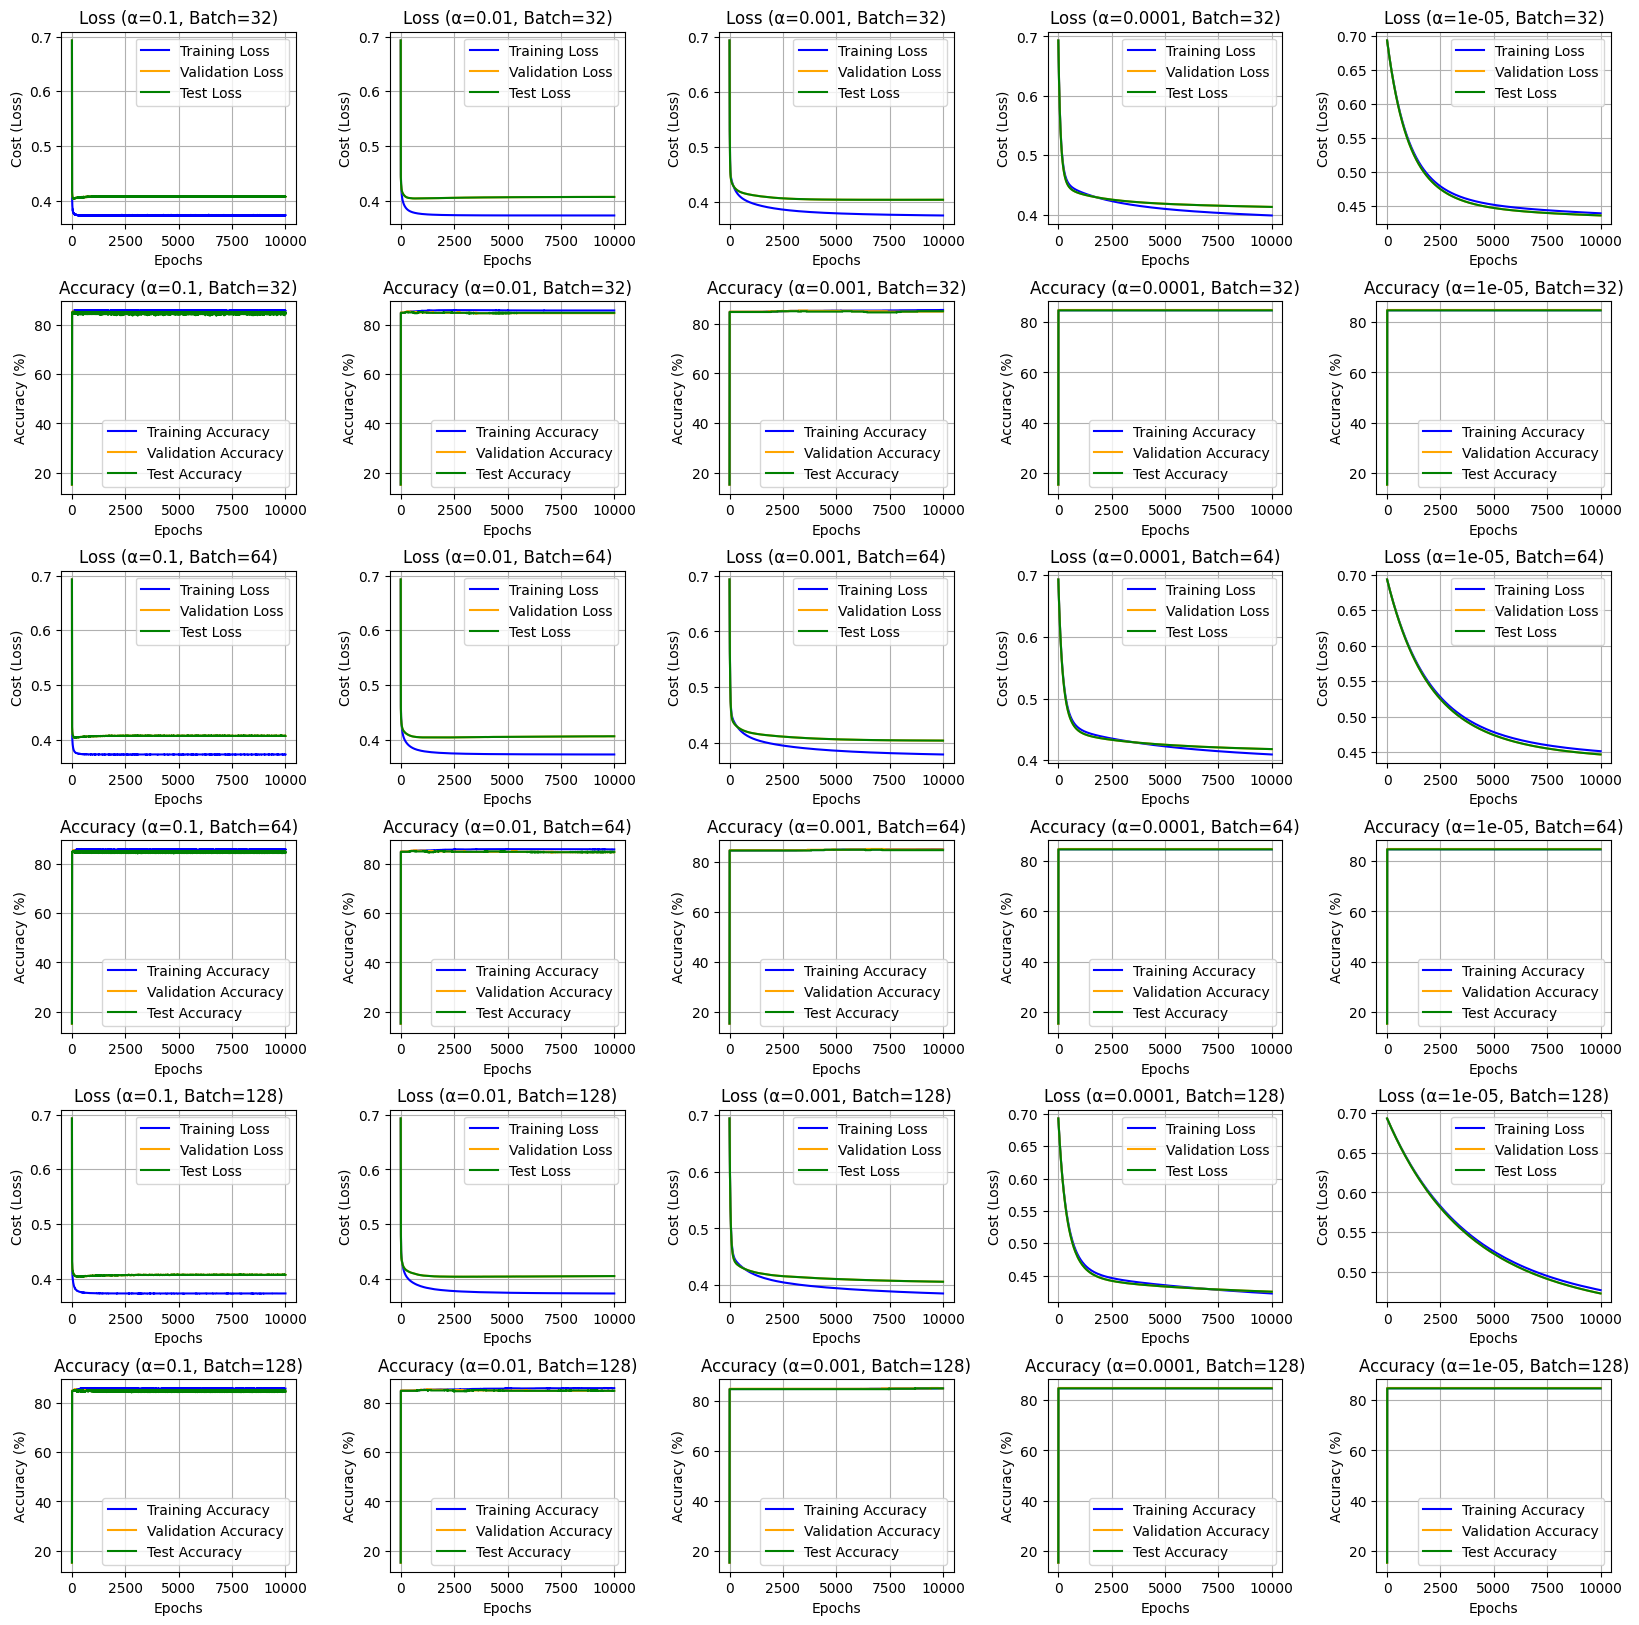

In [47]:
fig, axes = plt.subplots(6, 5, figsize=(20, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot for each combination of learning rate and batch size
for j, batch_size in enumerate(batch_sizes):
    for i, alpha in enumerate(learning_rates):
        # Calculate the row index for loss (even rows) and accuracy (odd rows)
        loss_row_idx = j * 2     # Rows for loss
        acc_row_idx = j * 2 + 1  # Rows for accuracy

        # Plot loss for the given learning rate and batch size
        axes[loss_row_idx, i].plot(range(epochs), results[(alpha, batch_size)]["J_train"], label='Training Loss', color='blue')
        axes[loss_row_idx, i].plot(range(epochs), results[(alpha, batch_size)]["J_val"], label='Validation Loss', color='orange')
        axes[loss_row_idx, i].plot(range(epochs), results[(alpha, batch_size)]["J_test"], label='Test Loss', color='green')
        axes[loss_row_idx, i].set_title(f'Loss (α={alpha}, Batch={batch_size})')
        axes[loss_row_idx, i].set_xlabel('Epochs')
        axes[loss_row_idx, i].set_ylabel('Cost (Loss)')
        axes[loss_row_idx, i].grid(True)
        axes[loss_row_idx, i].legend()

        # Plot accuracy for the given learning rate and batch size
        axes[acc_row_idx, i].plot(range(epochs), results[(alpha, batch_size)]["accuracy_train"], label='Training Accuracy', color='blue')
        axes[acc_row_idx, i].plot(range(epochs), results[(alpha, batch_size)]["accuracy_val"], label='Validation Accuracy', color='orange')
        axes[acc_row_idx, i].plot(range(epochs), results[(alpha, batch_size)]["accuracy_test"], label='Test Accuracy', color='green')
        axes[acc_row_idx, i].set_title(f'Accuracy (α={alpha}, Batch={batch_size})')
        axes[acc_row_idx, i].set_xlabel('Epochs')
        axes[acc_row_idx, i].set_ylabel('Accuracy (%)')
        axes[acc_row_idx, i].grid(True)
        axes[acc_row_idx, i].legend()

plt.show()


<h3 align='center'>Part (e)</h3>

In [48]:
def batchGradientDescent(X, Y, X_val, Y_val, w, b, alpha, epochs):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []

    for i in range(epochs):
        cost = computeCostFunc(X, Y, w, b)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFunc(X_val, Y_val, w, b)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        dj_db, dj_dw = computeGradient(X, Y, w, b)   

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history


In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
m = X.shape[0]  # number of samples
k = 5
fold_size = m//k

# K-Fold Cross Validation
def k_fold_cross_validation(X, Y, k, alpha, epochs):

    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []
    
    for fold in range(k):
        print(f"Fold {fold + 1}:")

        # Create the validation fold
        val_start = fold * fold_size
        val_end = val_start + fold_size
        X_val_fold = X[val_start:val_end]
        Y_val_fold = Y[val_start:val_end]

        # Create the training fold
        X_train_fold = np.concatenate([X[:val_start], X[val_end:]], axis=0)
        Y_train_fold = np.concatenate([Y[:val_start], Y[val_end:]], axis=0)

        w = np.zeros(X_train_fold.shape[1])
        b = 0.

        # Train the model using Batch Gradient Descent
        J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescent(
            X_train_fold, Y_train_fold, X_val_fold, Y_val_fold, w, b, alpha, epochs)
        
        # Make predictions on the validation set
        accuracy, Y_pred, Y_pred_prob = predict(X_val_fold, Y_val_fold, w_history[-1], b_history[-1])

        # Calculate metrics
        accuracy = np.mean(Y_pred == Y_val_fold)
        precision = precision_score(Y_val_fold, Y_pred)
        recall = recall_score(Y_val_fold, Y_pred)
        f1 = f1_score(Y_val_fold, Y_pred)
        
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

        cm = confusion_matrix(Y_val_fold, Y_pred)
        print("Confusion Matrix:")
        print(cm)

        # Plot confusion matrix
        cm_display = ConfusionMatrixDisplay(cm, display_labels = ["No Heart Disease", "Heart Disease"])
        cm_display.plot()
        plt.show()

        plt.figure(figsize=(8,6))
        plt.plot(range(epochs), J_history, label='Cost')
        plt.xlabel('Epochs')
        plt.ylabel('Cost (J)')
        plt.title('Training Cost vs Epochs')
        plt.grid(True)
        plt.legend()
        plt.show()

        plt.figure(figsize=(8,6))
        plt.plot(range(epochs), J_val_history, label='Cost')
        plt.xlabel('Epochs')
        plt.ylabel('Cost (J)')
        plt.title('Validation Cost vs Epochs')
        plt.grid(True)
        plt.legend()
        plt.show()
    
    # Calculate average and standard deviation for each metric
    accuracy_mean, accuracy_std = np.mean(accuracy_list), np.std(accuracy_list)
    precision_mean, precision_std = np.mean(precision_list), np.std(precision_list)
    recall_mean, recall_std = np.mean(recall_list), np.std(recall_list)
    f1_mean, f1_std = np.mean(f1_list), np.std(f1_list)

    print(accuracy_list)
    print(precision_list)
    print(recall_list)
    print(f1_list)
    
    return accuracy_mean, accuracy_std, precision_mean, precision_std, recall_mean, recall_std, f1_mean, f1_std


Fold 1:
Iteration 0: Training Loss: 0.6931, Training Accuracy: 14.80%
Iteration 1000: Training Loss: 0.4315, Training Accuracy: 85.20%
Iteration 2000: Training Loss: 0.4193, Training Accuracy: 85.20%
Iteration 3000: Training Loss: 0.4113, Training Accuracy: 85.20%
Iteration 4000: Training Loss: 0.4059, Training Accuracy: 85.20%
Iteration 5000: Training Loss: 0.4019, Training Accuracy: 85.20%
Iteration 6000: Training Loss: 0.3990, Training Accuracy: 85.20%
Iteration 7000: Training Loss: 0.3967, Training Accuracy: 85.20%
Iteration 8000: Training Loss: 0.3947, Training Accuracy: 85.20%
Iteration 9000: Training Loss: 0.3931, Training Accuracy: 85.20%
Iteration 10000: Training Loss: 0.3917, Training Accuracy: 85.20%
Iteration 11000: Training Loss: 0.3905, Training Accuracy: 85.20%
Iteration 12000: Training Loss: 0.3894, Training Accuracy: 85.20%
Iteration 13000: Training Loss: 0.3884, Training Accuracy: 85.20%
Iteration 14000: Training Loss: 0.3874, Training Accuracy: 85.23%
Iteration 15000

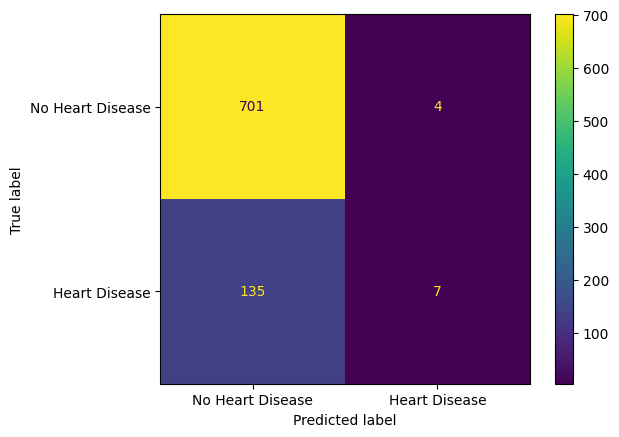

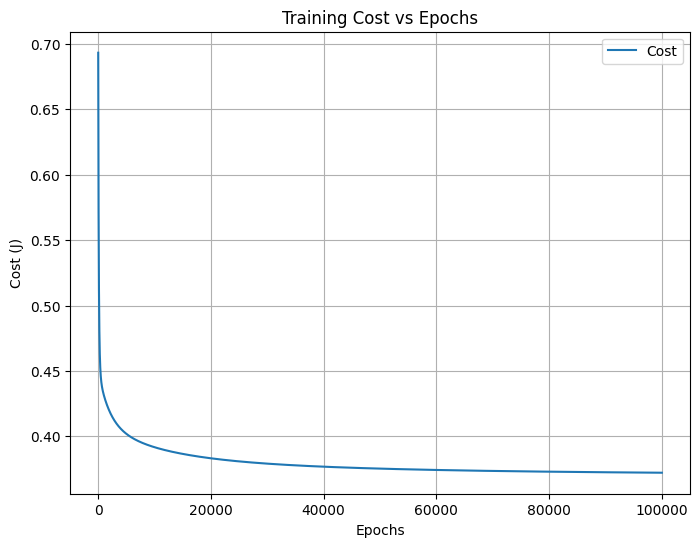

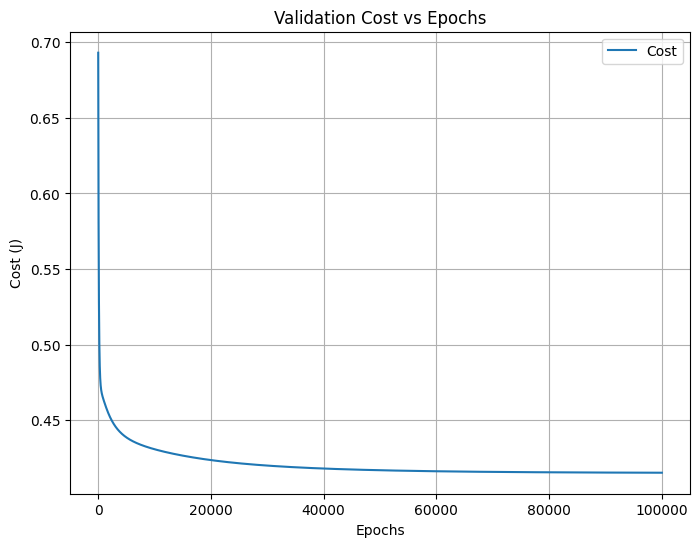

Fold 2:
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.57%
Iteration 1000: Training Loss: 0.4438, Training Accuracy: 84.43%
Iteration 2000: Training Loss: 0.4316, Training Accuracy: 84.43%
Iteration 3000: Training Loss: 0.4238, Training Accuracy: 84.43%
Iteration 4000: Training Loss: 0.4185, Training Accuracy: 84.43%
Iteration 5000: Training Loss: 0.4147, Training Accuracy: 84.43%
Iteration 6000: Training Loss: 0.4118, Training Accuracy: 84.43%
Iteration 7000: Training Loss: 0.4096, Training Accuracy: 84.43%
Iteration 8000: Training Loss: 0.4077, Training Accuracy: 84.43%
Iteration 9000: Training Loss: 0.4061, Training Accuracy: 84.43%
Iteration 10000: Training Loss: 0.4047, Training Accuracy: 84.43%
Iteration 11000: Training Loss: 0.4035, Training Accuracy: 84.46%
Iteration 12000: Training Loss: 0.4024, Training Accuracy: 84.46%
Iteration 13000: Training Loss: 0.4014, Training Accuracy: 84.46%
Iteration 14000: Training Loss: 0.4005, Training Accuracy: 84.52%
Iteration 15000

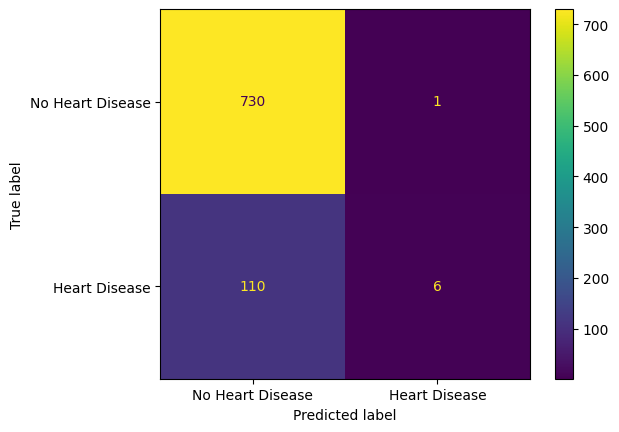

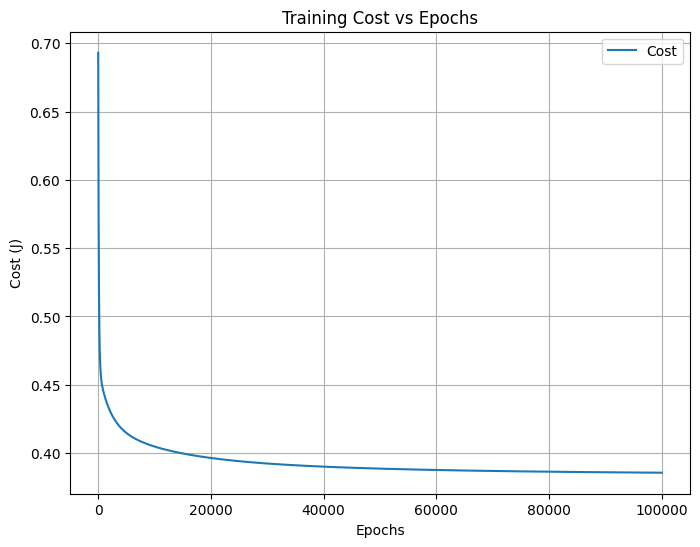

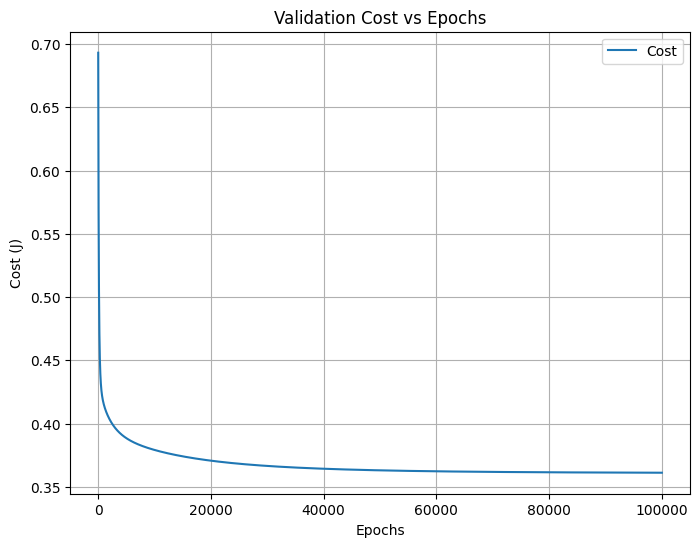

Fold 3:
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.16%
Iteration 1000: Training Loss: 0.4373, Training Accuracy: 84.84%
Iteration 2000: Training Loss: 0.4251, Training Accuracy: 84.84%
Iteration 3000: Training Loss: 0.4173, Training Accuracy: 84.84%
Iteration 4000: Training Loss: 0.4120, Training Accuracy: 84.84%
Iteration 5000: Training Loss: 0.4081, Training Accuracy: 84.84%
Iteration 6000: Training Loss: 0.4052, Training Accuracy: 84.84%
Iteration 7000: Training Loss: 0.4029, Training Accuracy: 84.84%
Iteration 8000: Training Loss: 0.4010, Training Accuracy: 84.84%
Iteration 9000: Training Loss: 0.3994, Training Accuracy: 84.84%
Iteration 10000: Training Loss: 0.3980, Training Accuracy: 84.84%
Iteration 11000: Training Loss: 0.3967, Training Accuracy: 84.87%
Iteration 12000: Training Loss: 0.3956, Training Accuracy: 84.87%
Iteration 13000: Training Loss: 0.3946, Training Accuracy: 84.87%
Iteration 14000: Training Loss: 0.3937, Training Accuracy: 84.87%
Iteration 15000

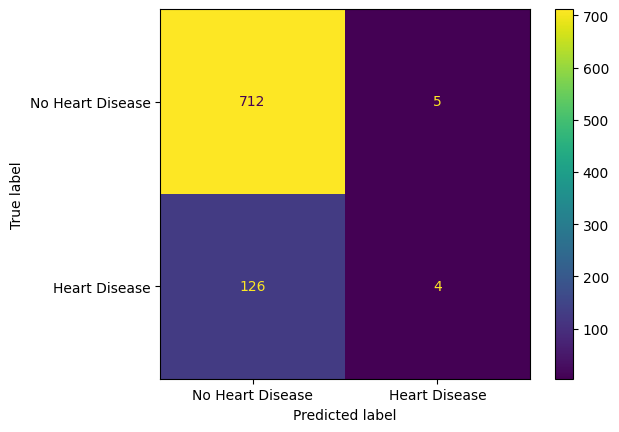

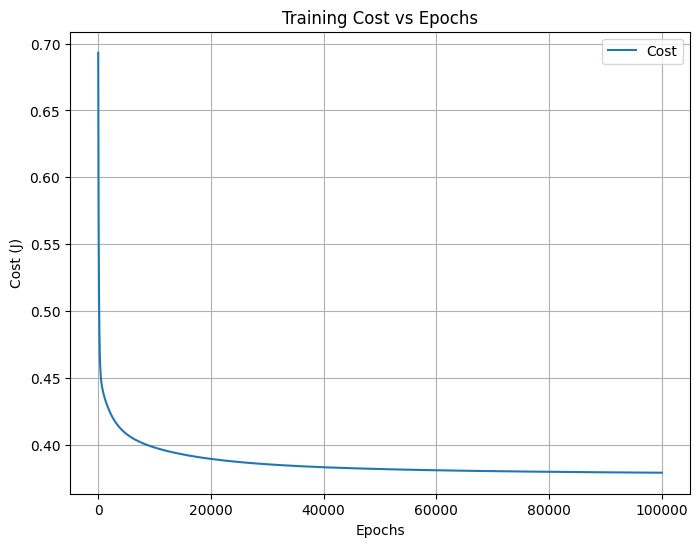

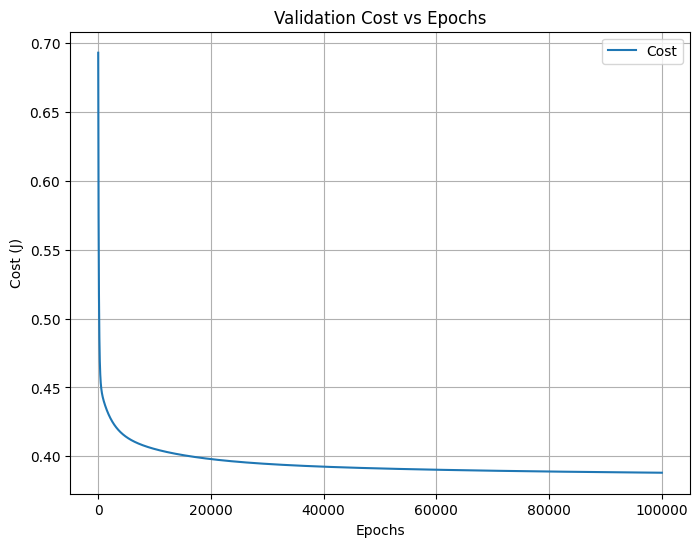

Fold 4:
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.19%
Iteration 1000: Training Loss: 0.4380, Training Accuracy: 84.81%
Iteration 2000: Training Loss: 0.4270, Training Accuracy: 84.81%
Iteration 3000: Training Loss: 0.4197, Training Accuracy: 84.81%
Iteration 4000: Training Loss: 0.4146, Training Accuracy: 84.81%
Iteration 5000: Training Loss: 0.4108, Training Accuracy: 84.81%
Iteration 6000: Training Loss: 0.4079, Training Accuracy: 84.81%
Iteration 7000: Training Loss: 0.4056, Training Accuracy: 84.81%
Iteration 8000: Training Loss: 0.4036, Training Accuracy: 84.81%
Iteration 9000: Training Loss: 0.4019, Training Accuracy: 84.81%
Iteration 10000: Training Loss: 0.4005, Training Accuracy: 84.81%
Iteration 11000: Training Loss: 0.3992, Training Accuracy: 84.84%
Iteration 12000: Training Loss: 0.3980, Training Accuracy: 84.84%
Iteration 13000: Training Loss: 0.3970, Training Accuracy: 84.84%
Iteration 14000: Training Loss: 0.3960, Training Accuracy: 84.84%
Iteration 15000

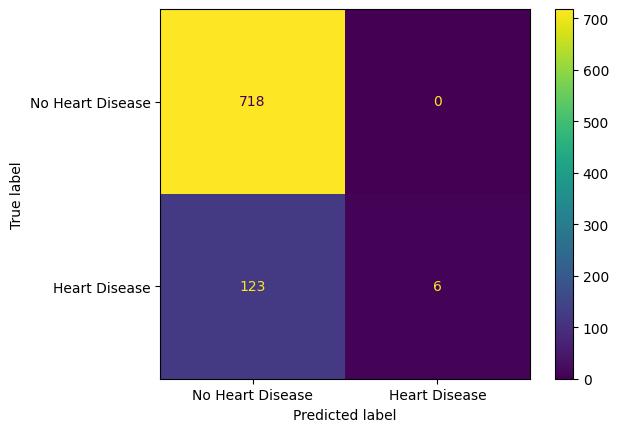

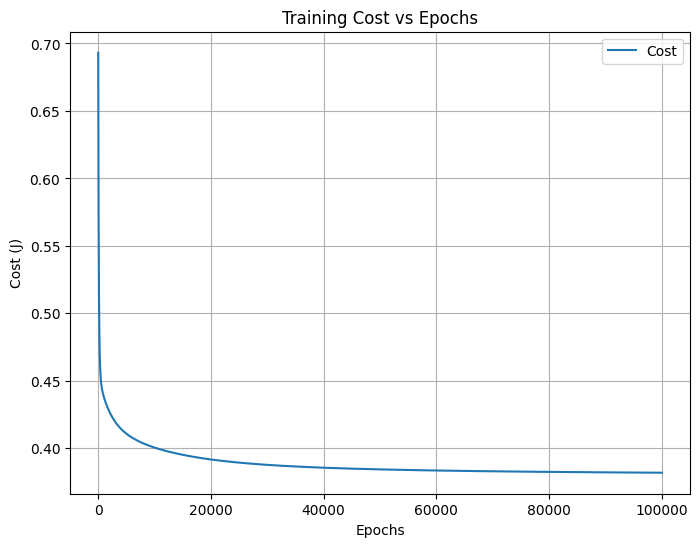

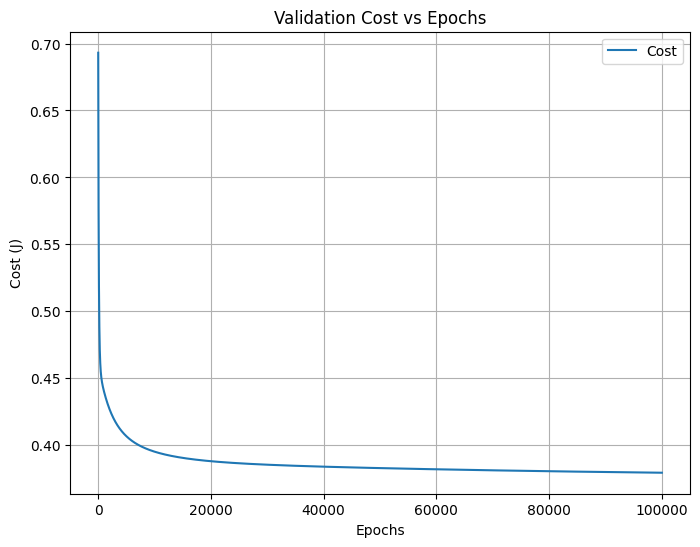

Fold 5:
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.25%
Iteration 1000: Training Loss: 0.4388, Training Accuracy: 84.75%
Iteration 2000: Training Loss: 0.4272, Training Accuracy: 84.75%
Iteration 3000: Training Loss: 0.4196, Training Accuracy: 84.75%
Iteration 4000: Training Loss: 0.4144, Training Accuracy: 84.75%
Iteration 5000: Training Loss: 0.4107, Training Accuracy: 84.75%
Iteration 6000: Training Loss: 0.4080, Training Accuracy: 84.75%
Iteration 7000: Training Loss: 0.4058, Training Accuracy: 84.75%
Iteration 8000: Training Loss: 0.4040, Training Accuracy: 84.75%
Iteration 9000: Training Loss: 0.4024, Training Accuracy: 84.75%
Iteration 10000: Training Loss: 0.4011, Training Accuracy: 84.75%
Iteration 11000: Training Loss: 0.3999, Training Accuracy: 84.75%
Iteration 12000: Training Loss: 0.3988, Training Accuracy: 84.75%
Iteration 13000: Training Loss: 0.3979, Training Accuracy: 84.75%
Iteration 14000: Training Loss: 0.3970, Training Accuracy: 84.84%
Iteration 15000

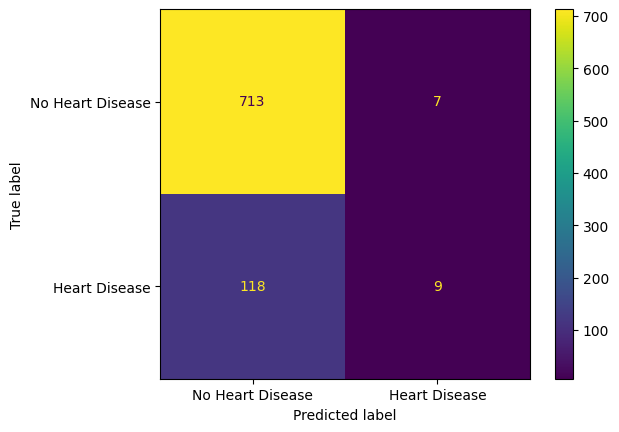

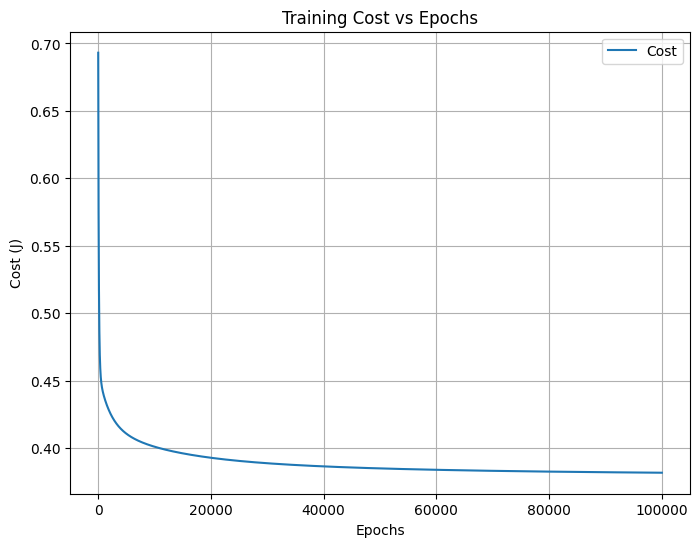

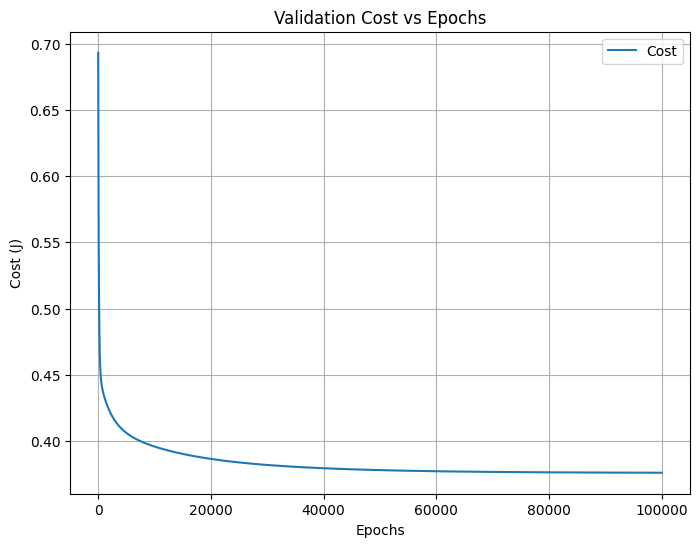

[0.8358913813459268, 0.8689492325855962, 0.8453364817001181, 0.8547815820543093, 0.8524203069657615]
[0.6363636363636364, 0.8571428571428571, 0.4444444444444444, 1.0, 0.5625]
[0.04929577464788732, 0.05172413793103448, 0.03076923076923077, 0.046511627906976744, 0.07086614173228346]
[0.0915032679738562, 0.0975609756097561, 0.05755395683453238, 0.08888888888888889, 0.1258741258741259]
Accuracy: 0.8515 ± 0.0109
Precision: 0.7001 ± 0.2015
Recall: 0.0498 ± 0.0128
F1 Score: 0.0923 ± 0.0218


In [50]:
# Parameters
epochs = 100000
alpha = 0.01
k = 5

# Perform K-Fold Cross Validation
accuracy_mean, accuracy_std, precision_mean, precision_std, recall_mean, recall_std, f1_mean, f1_std = k_fold_cross_validation(X, Y, k, alpha, epochs)

# Output the results
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.4f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.4f}")
print(f"F1 Score: {f1_mean:.4f} ± {f1_std:.4f}")


In [51]:
# Output the results
print(f"Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
print(f"Precision: {precision_mean:.4f} ± {precision_std:.4f}")
print(f"Recall: {recall_mean:.4f} ± {recall_std:.4f}")
print(f"F1 Score: {f1_mean:.4f} ± {f1_std:.4f}")

Accuracy: 0.8515 ± 0.0109
Precision: 0.7001 ± 0.2015
Recall: 0.0498 ± 0.0128
F1 Score: 0.0923 ± 0.0218


<h3 align='center'>Part (f)</h3>

In [52]:
# L1 Regularization (Lasso)
def computeCostFuncL1(X, Y, w, b, lambda_):
    m = X.shape[0]
    regularization_cost = (lambda_/m) * np.sum(np.abs(w))
    cost = computeCostFunc(X, Y, w, b) + regularization_cost
    return cost

# L2 Regularization (Ridge)
def computeCostFuncL2(X, Y, w, b, lambda_):
    m = X.shape[0]
    regularization_cost = (lambda_/(2*m)) * np.sum(np.square(w))
    cost = computeCostFunc(X, Y, w, b) + regularization_cost
    return cost

# Gradient computation with L1 Regularization (Lasso)
def computeGradientL1(X, Y, w, b, lambda_):
    m = X.shape[0]
    dj_db, dj_dw = computeGradient(X, Y, w, b)  
    dj_dw += (lambda_/m) * np.sign(w) # Added L1 regularization term for w
   
    return dj_db, dj_dw

# Gradient computation with L2 Regularization (Ridge)
def computeGradientL2(X, Y, w, b, lambda_):
    m = X.shape[0]
    dj_db, dj_dw = computeGradient(X, Y, w, b)  
    dj_dw += (lambda_/m) * w  # Added L2 regularization term for w
    
    return dj_db, dj_dw


In [53]:
def batchGradientDescentL1(X, Y, X_val, Y_val, w, b, alpha, epochs, lambda_):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []

    for i in range(epochs):
        cost = computeCostFuncL1(X, Y, w, b, lambda_)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFuncL1(X_val, Y_val, w, b, lambda_)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        # Compute the gradients
        dj_db, dj_dw = computeGradientL1(X, Y, w, b, lambda_)   

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history

def batchGradientDescentL2(X, Y, X_val, Y_val, w, b, alpha, epochs, lambda_):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []

    for i in range(epochs):
        cost = computeCostFuncL2(X, Y, w, b, lambda_)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFuncL2(X_val, Y_val, w, b, lambda_)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        # Compute the gradients
        dj_db, dj_dw = computeGradientL2(X, Y, w, b, lambda_)   

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history


In [54]:
# Logistic Regression with Batch Gradient Descent with L1 Regularization with No Stopping Criteria
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000
lambda_ = 3

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescentL1(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs, lambda_)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 11.0338, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 1.9797, Training Accuracy: 82.20%
Iteration 3000: Training Loss: 1.3698, Training Accuracy: 79.64%
Iteration 4000: Training Loss: 6.0665, Training Accuracy: 84.79%
Iteration 5000: Training Loss: 7.1912, Training Accuracy: 84.79%
Iteration 6000: Training Loss: 9.1584, Training Accuracy: 84.79%
Iteration 7000: Training Loss: 5.7653, Training Accuracy: 84.79%
Iteration 8000: Training Loss: 4.1528, Training Accuracy: 84.96%
Iteration 9000: Training Loss: 16.8979, Training Accuracy: 84.79%
Running gradient descent for learning rate: 1
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.3850, Training Accuracy: 85.20%
Iteration 2000: Training Loss: 0.3845, Training Accuracy: 85.27%
Iteration 3000: Training Loss: 0.3844, Training Accuracy: 85.30%


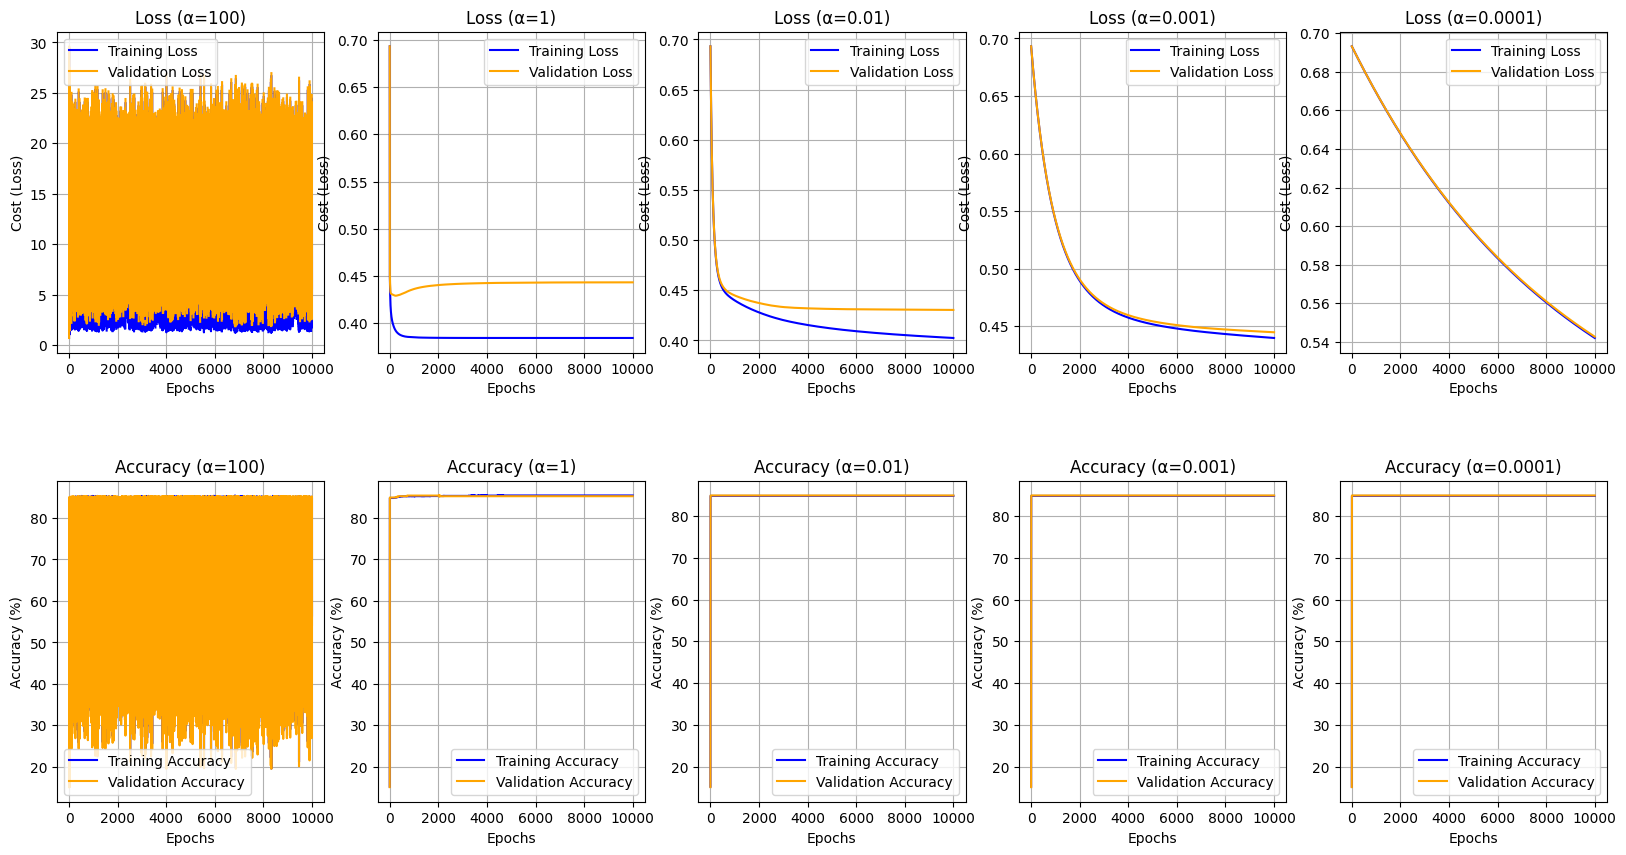

In [55]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    # Plot loss in the top row
    axes[0, idx].plot(range(epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()

In [56]:
# Logistic Regression with Batch Gradient Descent with L2 Regularization with No Stopping Criteria
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000
lambda_ = 3

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescentL2(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs, lambda_)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 9.3412, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 5.9952, Training Accuracy: 84.79%
Iteration 3000: Training Loss: 7.8576, Training Accuracy: 84.79%
Iteration 4000: Training Loss: 4.8638, Training Accuracy: 84.79%
Iteration 5000: Training Loss: 5.0956, Training Accuracy: 84.79%
Iteration 6000: Training Loss: 13.4402, Training Accuracy: 84.79%
Iteration 7000: Training Loss: 17.1456, Training Accuracy: 84.79%
Iteration 8000: Training Loss: 12.4637, Training Accuracy: 84.79%
Iteration 9000: Training Loss: 11.1617, Training Accuracy: 84.79%
Running gradient descent for learning rate: 1
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.3816, Training Accuracy: 85.27%
Iteration 2000: Training Loss: 0.3813, Training Accuracy: 85.33%
Iteration 3000: Training Loss: 0.3813, Training Accuracy: 85.33

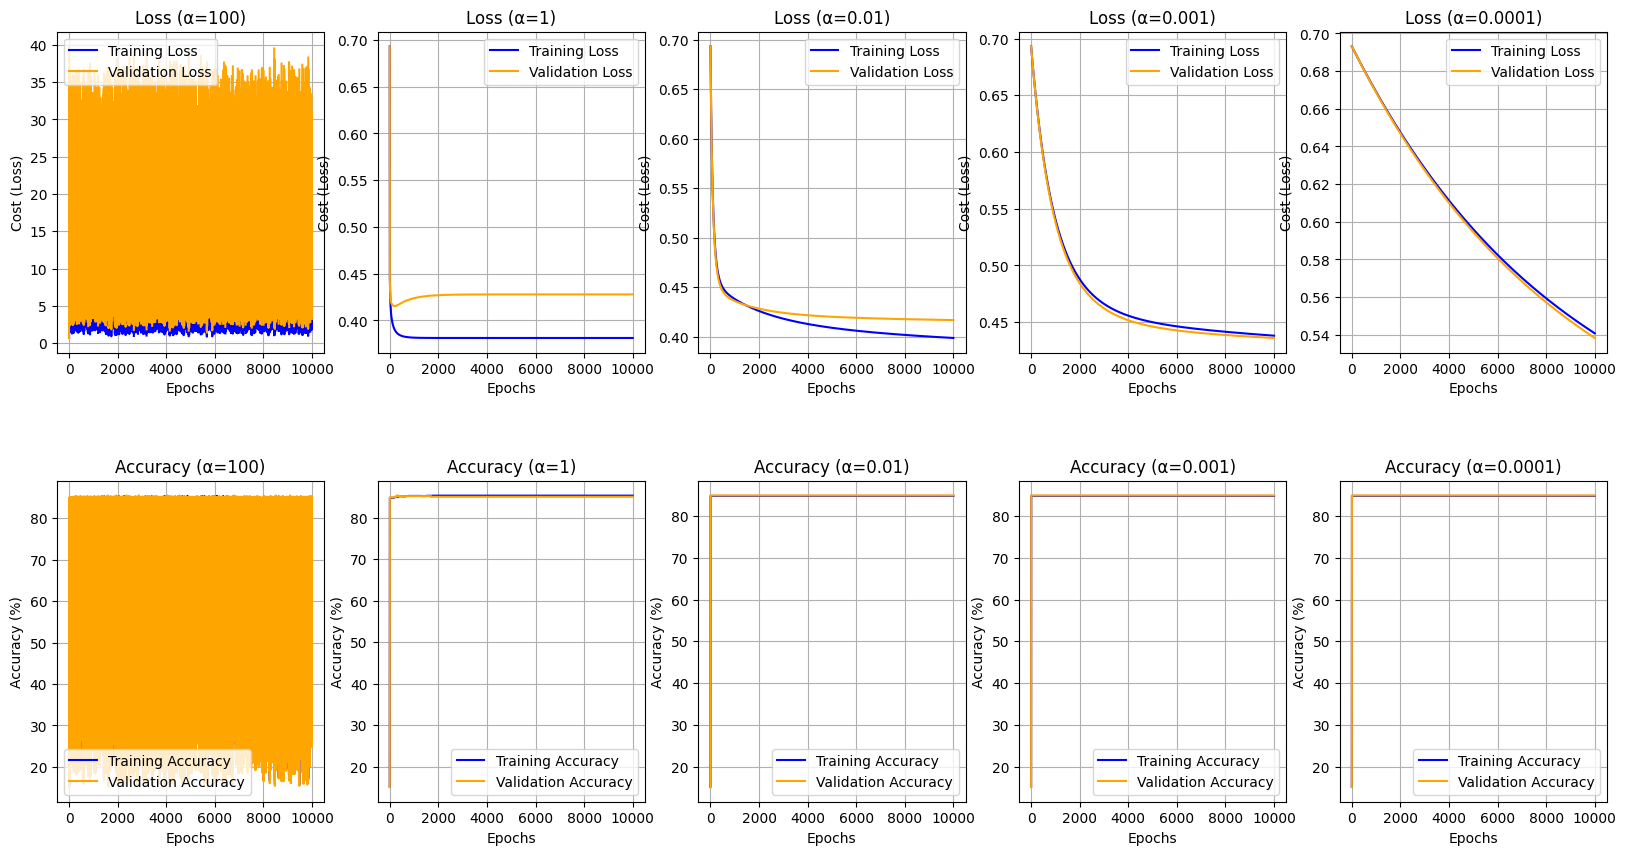

In [57]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    # Plot loss in the top row
    axes[0, idx].plot(range(epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()

In [58]:
def batchGradientDescentEarlyStopping(X, Y, X_val, Y_val, w, b, alpha, epochs):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    best_loss = float('inf')  # To store the best validation loss

    for i in range(epochs):
        cost = computeCostFunc(X, Y, w, b)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFunc(X_val, Y_val, w, b)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        # Compute the gradients
        dj_db, dj_dw = computeGradient(X, Y, w, b)   

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Early stopping condition
        if val_cost < best_loss:
            best_loss = val_cost
        else:
            print(f"Early stopping at epoch {i} with validation loss {best_loss}")
            break

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history


In [59]:
# Logistic Regression with Batch Gradient Descent with Early Stopping Criteria 1
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescentEarlyStopping(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 1 with validation loss 0.6931471805599454
Running gradient descent for learning rate: 1
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 714 with validation loss 0.40397413376363955
Running gradient descent for learning rate: 0.01
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.4379, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 0.4257, Training Accuracy: 84.79%
Iteration 3000: Training Loss: 0.4178, Training Accuracy: 84.79%
Iteration 4000: Training Loss: 0.4124, Training Accuracy: 84.79%
Iteration 5000: Training Loss: 0.4084, Training Accuracy: 84.79%
Iteration 6000: Training Loss: 0.4053, Training Accuracy: 84.79%
Iteration 7000: Training Loss: 0.4029, Training Accuracy: 84.79%
Iteration 8000: Training Loss: 0.4009, Training Accuracy: 84.79%
Iteration 9000: 

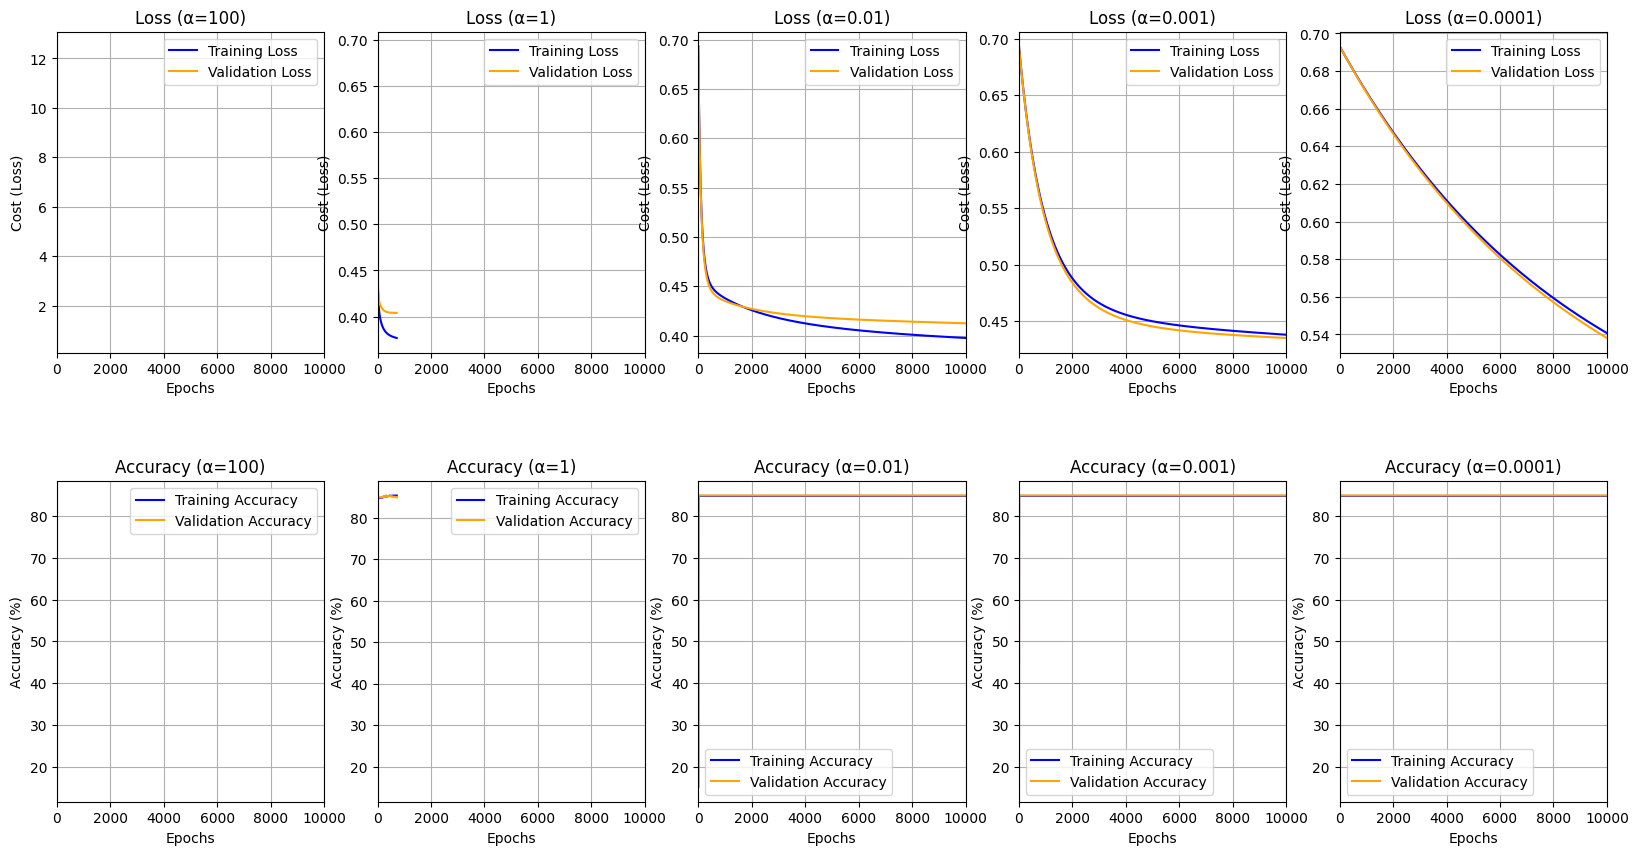

In [60]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

total_epochs = 10000

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    num_epochs = len(results[alpha]["J_train"])

    # Plot loss in the top row
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()


In [61]:
def batchGradientDescentL1EarlyStopping(X, Y, X_val, Y_val, w, b, alpha, epochs, lambda_):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    best_loss = float('inf')  # To store the best validation loss

    for i in range(epochs):
        cost = computeCostFuncL1(X, Y, w, b, lambda_)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFuncL1(X_val, Y_val, w, b, lambda_)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        # Compute the gradients
        dj_db, dj_dw = computeGradientL1(X, Y, w, b, lambda_)   

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Early stopping condition
        if val_cost < best_loss:
            best_loss = val_cost
        else:
            print(f"Early stopping at epoch {i} with validation loss {best_loss}")
            break

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history

def batchGradientDescentL2EarlyStopping(X, Y, X_val, Y_val, w, b, alpha, epochs, lambda_):
    m, n = X.shape
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    best_loss = float('inf')  # To store the best validation loss

    for i in range(epochs):
        cost = computeCostFuncL2(X, Y, w, b, lambda_)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFuncL2(X_val, Y_val, w, b, lambda_)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        # Compute the gradients
        dj_db, dj_dw = computeGradientL2(X, Y, w, b, lambda_)   

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Early stopping condition
        if val_cost < best_loss:
            best_loss = val_cost
        else:
            print(f"Early stopping at epoch {i} with validation loss {best_loss}")
            break

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history


In [62]:
# Logistic Regression with Batch Gradient Descent with L1 Regularization with Early Stopping Criteria 1
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000
lambda_ = 3

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescentL1EarlyStopping(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs, lambda_)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 1 with validation loss 0.6931471805599454
Running gradient descent for learning rate: 1
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 182 with validation loss 0.42947354508589486
Running gradient descent for learning rate: 0.01
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.4398, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 0.4279, Training Accuracy: 84.79%
Iteration 3000: Training Loss: 0.4202, Training Accuracy: 84.79%
Iteration 4000: Training Loss: 0.4154, Training Accuracy: 84.79%
Iteration 5000: Training Loss: 0.4119, Training Accuracy: 84.79%
Iteration 6000: Training Loss: 0.4092, Training Accuracy: 84.79%
Iteration 7000: Training Loss: 0.4071, Training Accuracy: 84.79%
Iteration 8000: Training Loss: 0.4053, Training Accuracy: 84.79%
Iteration 9000: 

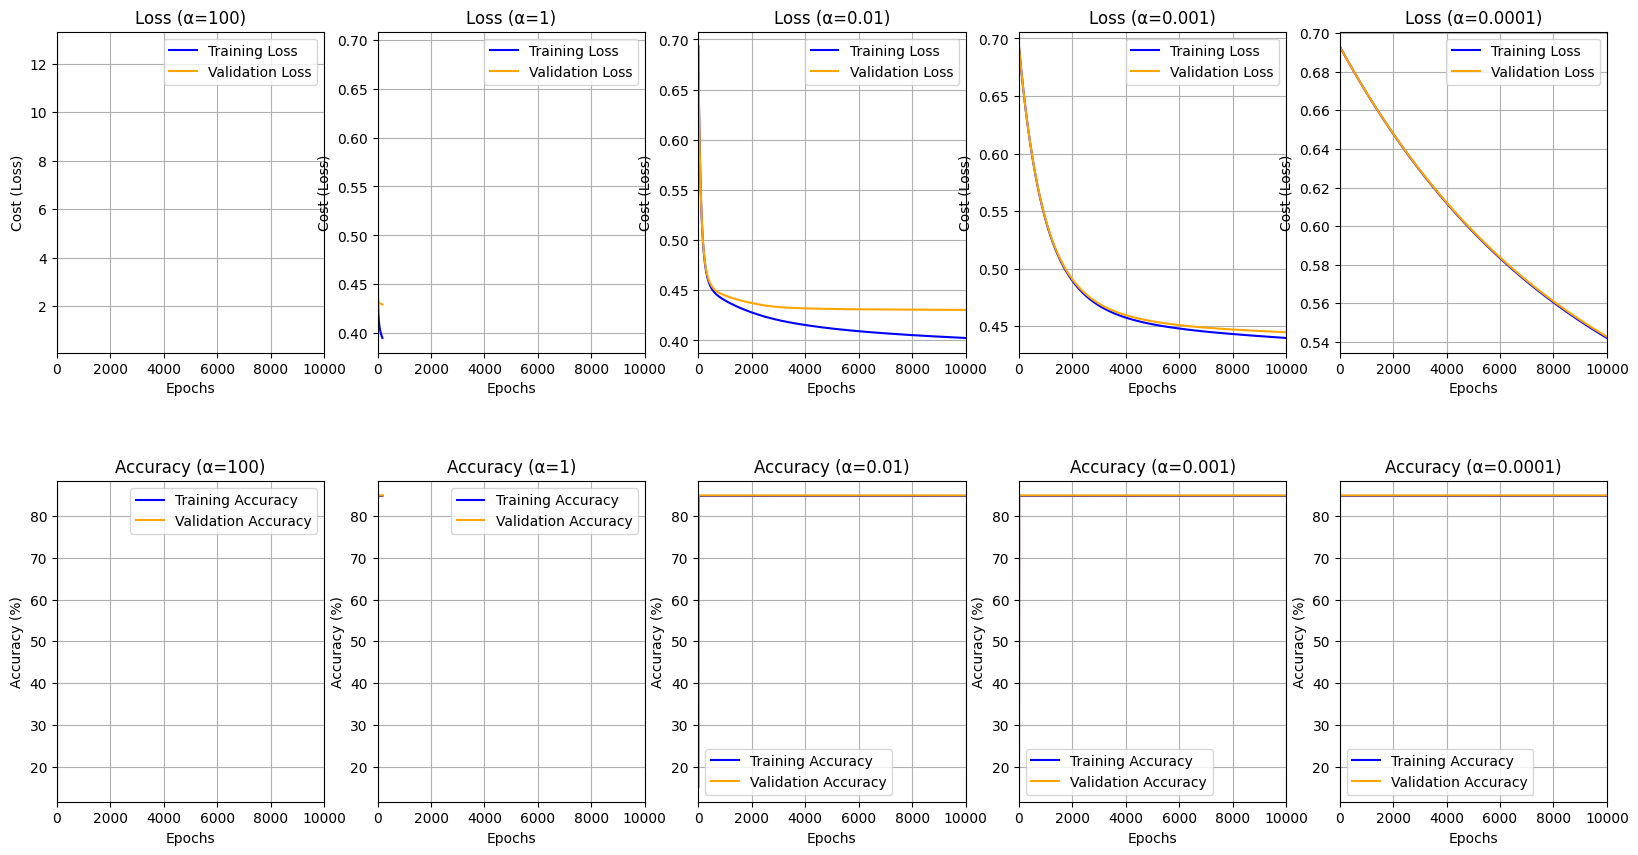

In [63]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

total_epochs = 10000

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    num_epochs = len(results[alpha]["J_train"])

    # Plot loss in the top row
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()


In [64]:
# Logistic Regression with Batch Gradient Descent with L2 Regularization with Early Stopping Criteria 1
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000
lambda_ = 3

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescentL2EarlyStopping(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs, lambda_)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 1 with validation loss 0.6931471805599454
Running gradient descent for learning rate: 1
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 202 with validation loss 0.41525415264279153
Running gradient descent for learning rate: 0.01
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.4381, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 0.4260, Training Accuracy: 84.79%
Iteration 3000: Training Loss: 0.4182, Training Accuracy: 84.79%
Iteration 4000: Training Loss: 0.4129, Training Accuracy: 84.79%
Iteration 5000: Training Loss: 0.4090, Training Accuracy: 84.79%
Iteration 6000: Training Loss: 0.4061, Training Accuracy: 84.79%
Iteration 7000: Training Loss: 0.4038, Training Accuracy: 84.79%
Iteration 8000: Training Loss: 0.4018, Training Accuracy: 84.79%
Iteration 9000: 

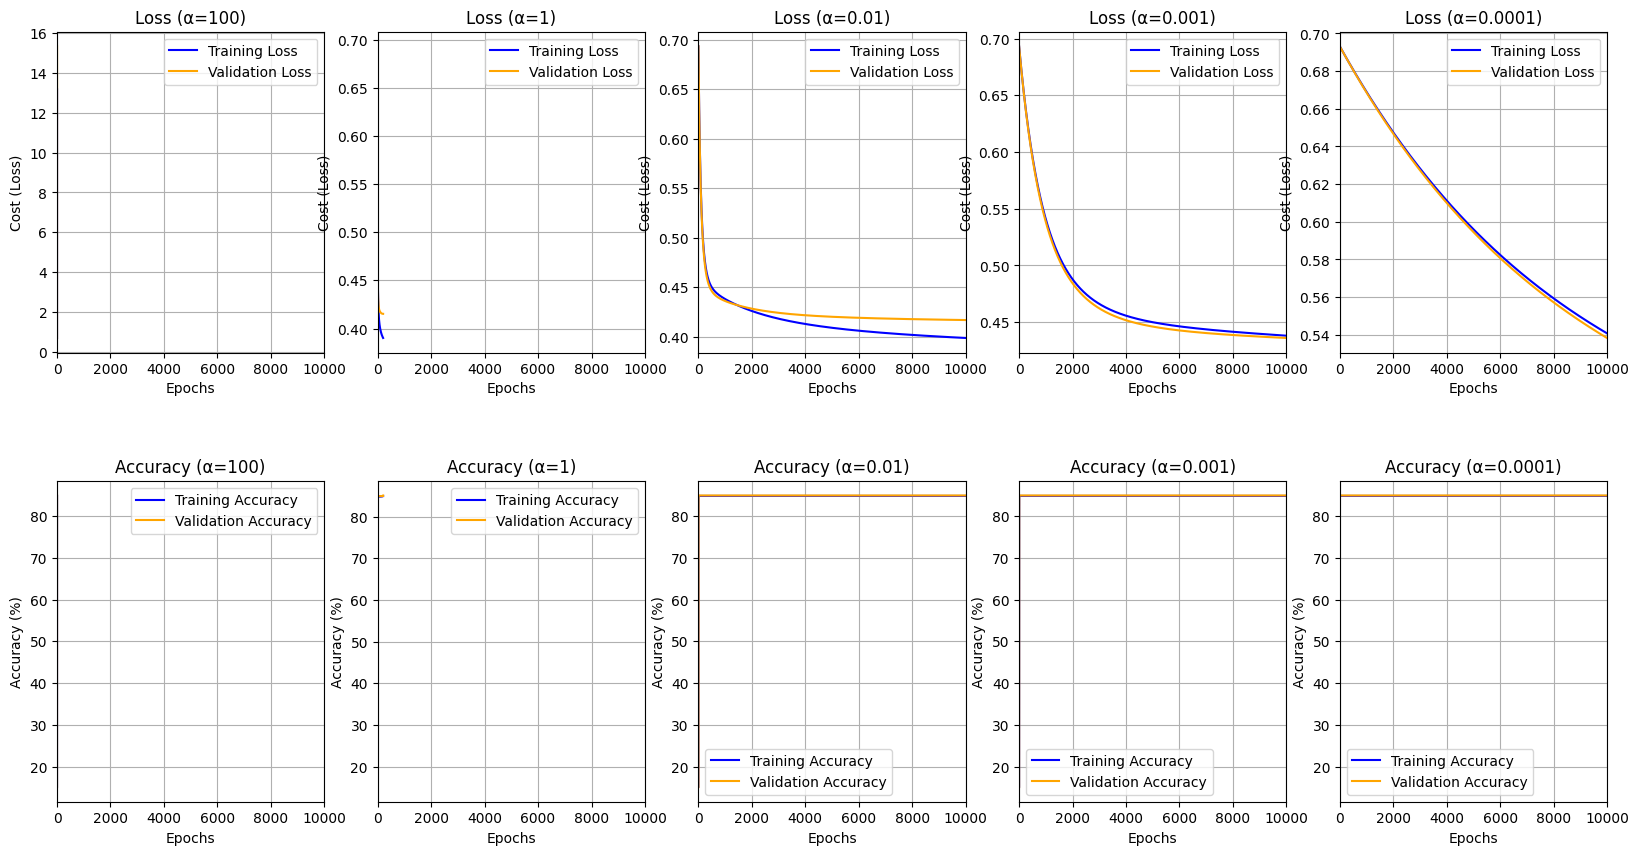

In [65]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

total_epochs = 10000

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    num_epochs = len(results[alpha]["J_train"])

    # Plot loss in the top row
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()


In [66]:
def batchGradientDescentEarlyStopping(X, Y, X_val, Y_val, w, b, alpha, epochs):
    m, n = X.shape
    threshold = 1e-6
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    best_loss = float('inf')  # To store the best validation loss
    prev_val_cost = None  # To track the validation cost in the previous iteration

    for i in range(epochs):
        cost = computeCostFunc(X, Y, w, b)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFunc(X_val, Y_val, w, b)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        # Compute the gradients
        dj_db, dj_dw = computeGradient(X, Y, w, b)   

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Early stopping condition
        if val_cost < best_loss:
            best_loss = val_cost
        else:
            print(f"Early stopping at epoch {i} with validation loss {best_loss}")
            break

        # Additional early stopping condition: If change in validation loss is less than threshold
        if prev_val_cost is not None and abs(prev_val_cost - val_cost) < threshold:
            print(f"Early stopping at epoch {i} due to small validation loss change: {val_cost}")
            break

        prev_val_cost = val_cost

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history


In [67]:
# Logistic Regression with Batch Gradient Descent with Early Stopping Criteria 2
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescentEarlyStopping(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 1 with validation loss 0.6931471805599454
Running gradient descent for learning rate: 1
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 569 due to small validation loss change: 0.4040333695364013
Running gradient descent for learning rate: 0.01
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.4379, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 0.4257, Training Accuracy: 84.79%
Iteration 3000: Training Loss: 0.4178, Training Accuracy: 84.79%
Iteration 4000: Training Loss: 0.4124, Training Accuracy: 84.79%
Iteration 5000: Training Loss: 0.4084, Training Accuracy: 84.79%
Iteration 6000: Training Loss: 0.4053, Training Accuracy: 84.79%
Iteration 7000: Training Loss: 0.4029, Training Accuracy: 84.79%
Early stopping at epoch 7212 due to small validation loss change: 

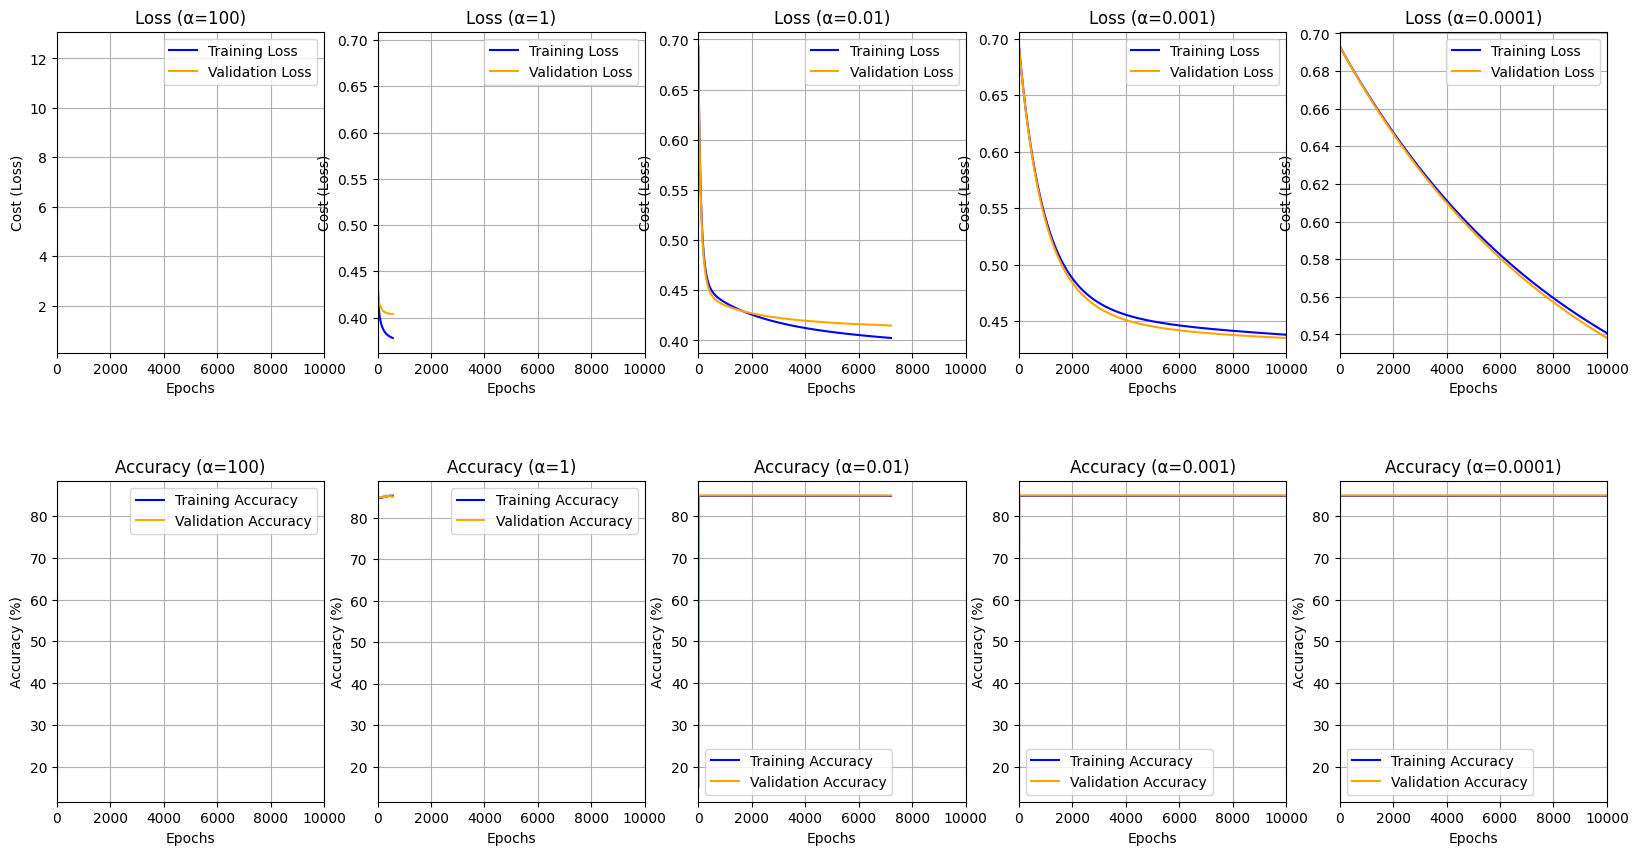

In [68]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

total_epochs = 10000

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    num_epochs = len(results[alpha]["J_train"])

    # Plot loss in the top row
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()


In [69]:
def batchGradientDescentL1EarlyStopping(X, Y, X_val, Y_val, w, b, alpha, epochs, lambda_):
    m, n = X.shape
    threshold = 1e-6
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    best_loss = float('inf')  # To store the best validation loss
    prev_val_cost = None  # To track the validation cost in the previous iteration

    for i in range(epochs):
        cost = computeCostFuncL1(X, Y, w, b, lambda_)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFuncL1(X_val, Y_val, w, b, lambda_)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        # Compute the gradients
        dj_db, dj_dw = computeGradientL1(X, Y, w, b, lambda_)   

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Early stopping condition
        if val_cost < best_loss:
            best_loss = val_cost
        else:
            print(f"Early stopping at epoch {i} with validation loss {best_loss}")
            break

        # Additional early stopping condition: If change in validation loss is less than threshold
        if prev_val_cost is not None and abs(prev_val_cost - val_cost) < threshold:
            print(f"Early stopping at epoch {i} due to small validation loss change: {val_cost}")
            break

        prev_val_cost = val_cost

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history

def batchGradientDescentL2EarlyStopping(X, Y, X_val, Y_val, w, b, alpha, epochs, lambda_):
    m, n = X.shape
    threshold = 1e-6
    J_history = []
    w_history = []
    b_history = []
    accuracy_history = []
    J_val_history = []
    accuracy_val_history = []
    best_loss = float('inf')  # To store the best validation loss
    prev_val_cost = None  # To track the validation cost in the previous iteration

    for i in range(epochs):
        cost = computeCostFuncL2(X, Y, w, b, lambda_)
        accuracy, _, _ = predict(X, Y, w, b)
        val_cost = computeCostFuncL2(X_val, Y_val, w, b, lambda_)
        val_accuracy, _, _ = predict(X_val, Y_val, w, b)

        J_history.append(cost)
        J_val_history.append(val_cost)
        w_history.append(w)
        b_history.append(b)
        accuracy_history.append(accuracy)
        accuracy_val_history.append(val_accuracy)

        # Compute the gradients
        dj_db, dj_dw = computeGradientL2(X, Y, w, b, lambda_)   

        # Update weights and bias
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Early stopping condition
        if val_cost < best_loss:
            best_loss = val_cost
        else:
            print(f"Early stopping at epoch {i} with validation loss {best_loss}")
            break

        # Additional early stopping condition: If change in validation loss is less than threshold
        if prev_val_cost is not None and abs(prev_val_cost - val_cost) < threshold:
            print(f"Early stopping at epoch {i} due to small validation loss change: {val_cost}")
            break

        prev_val_cost = val_cost

        if i % 1000 == 0:
            print(f"Iteration {i}: Training Loss: {cost:.4f}, Training Accuracy: {accuracy:.2f}%")

    return J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history


In [70]:
# Logistic Regression with Batch Gradient Descent with L1 Regularization with Early Stopping Criteria 2
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000
lambda_ = 3

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescentL1EarlyStopping(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs, lambda_)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 1 with validation loss 0.6931471805599454
Running gradient descent for learning rate: 1
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 182 with validation loss 0.42947354508589486
Running gradient descent for learning rate: 0.01
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.4398, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 0.4279, Training Accuracy: 84.79%
Iteration 3000: Training Loss: 0.4202, Training Accuracy: 84.79%
Early stopping at epoch 3694 due to small validation loss change: 0.4322476343678049
Running gradient descent for learning rate: 0.001
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.5421, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 0.4895, Training Accuracy: 84.79%
Iteration 3000

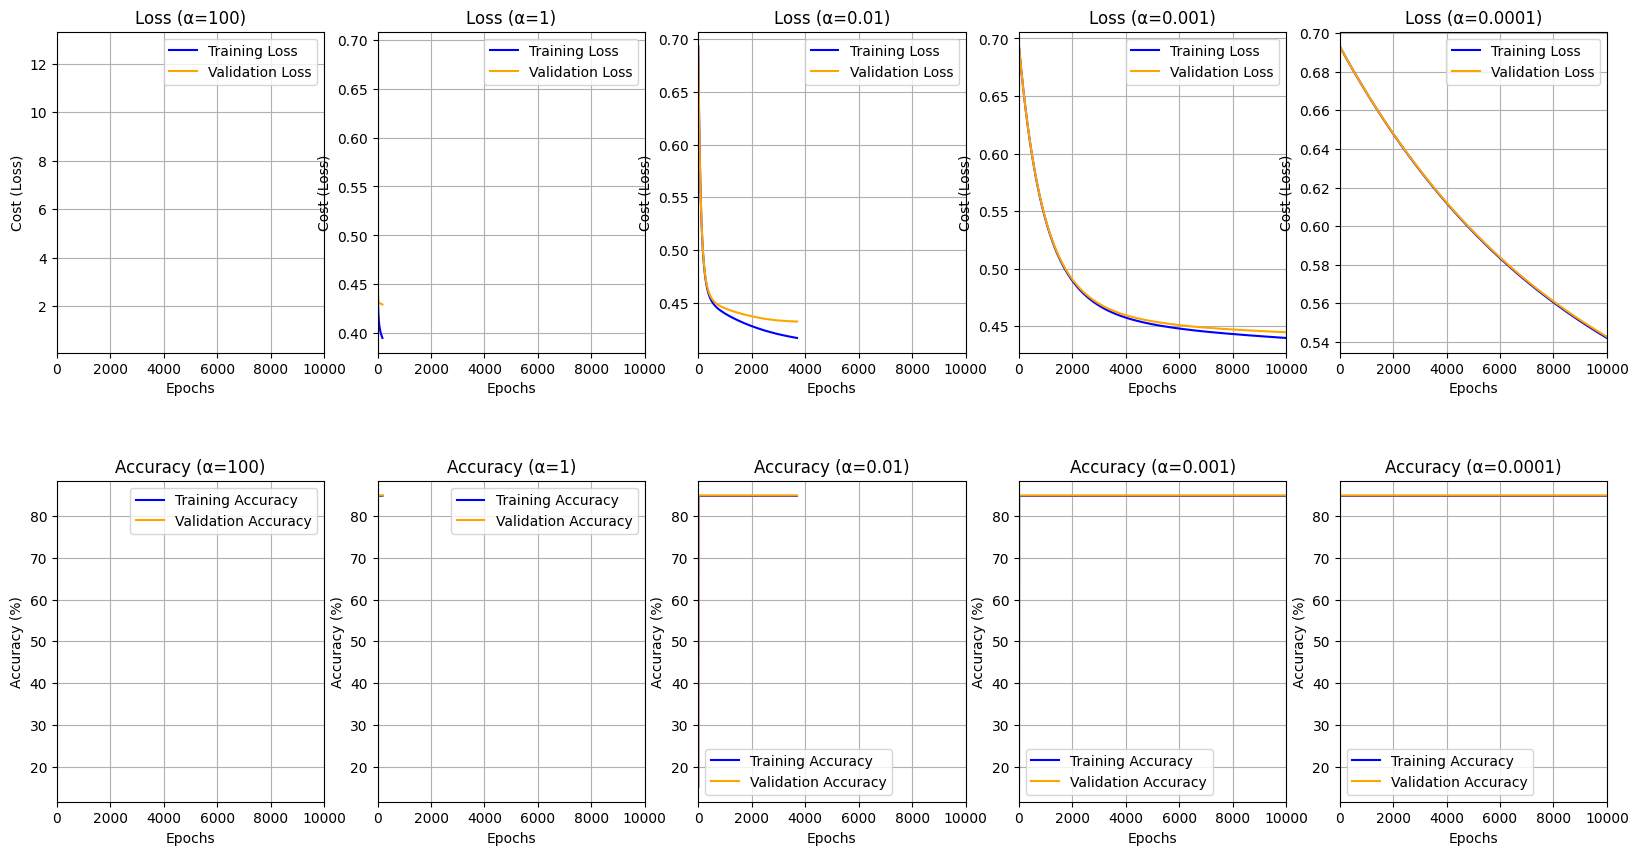

In [71]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

total_epochs = 10000

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    num_epochs = len(results[alpha]["J_train"])

    # Plot loss in the top row
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()


In [72]:
# Logistic Regression with Batch Gradient Descent with L2 Regularization with Early Stopping Criteria 2
# List of learning rates to try
learning_rates = [100, 1, 0.01, 0.001, 0.0001]
epochs = 10000
lambda_ = 3

results = {}

for alpha in learning_rates:
    # Reset the initial weights and bias
    w = np.zeros(n)
    b = 0.

    print(f"Running gradient descent for learning rate: {alpha}")

    # Run the batch gradient descent for this learning rate
    J_history, w_history, b_history, accuracy_history, J_val_history, accuracy_val_history = batchGradientDescentL2EarlyStopping(
        X_train, Y_train, X_val, Y_val, w, b, alpha, epochs, lambda_)

    results[alpha] = {
        "J_train": J_history,
        "J_val": J_val_history,
        "accuracy_train": accuracy_history,
        "accuracy_val": accuracy_val_history
    }

Running gradient descent for learning rate: 100
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 1 with validation loss 0.6931471805599454
Running gradient descent for learning rate: 1
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Early stopping at epoch 197 due to small validation loss change: 0.41525572864803534
Running gradient descent for learning rate: 0.01
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.21%
Iteration 1000: Training Loss: 0.4381, Training Accuracy: 84.79%
Iteration 2000: Training Loss: 0.4260, Training Accuracy: 84.79%
Iteration 3000: Training Loss: 0.4182, Training Accuracy: 84.79%
Iteration 4000: Training Loss: 0.4129, Training Accuracy: 84.79%
Iteration 5000: Training Loss: 0.4090, Training Accuracy: 84.79%
Early stopping at epoch 5588 due to small validation loss change: 0.41950377774425823
Running gradient descent for learning rate: 0.001
Iteration 0: Training Loss: 0.6931, Training Accuracy: 15.2

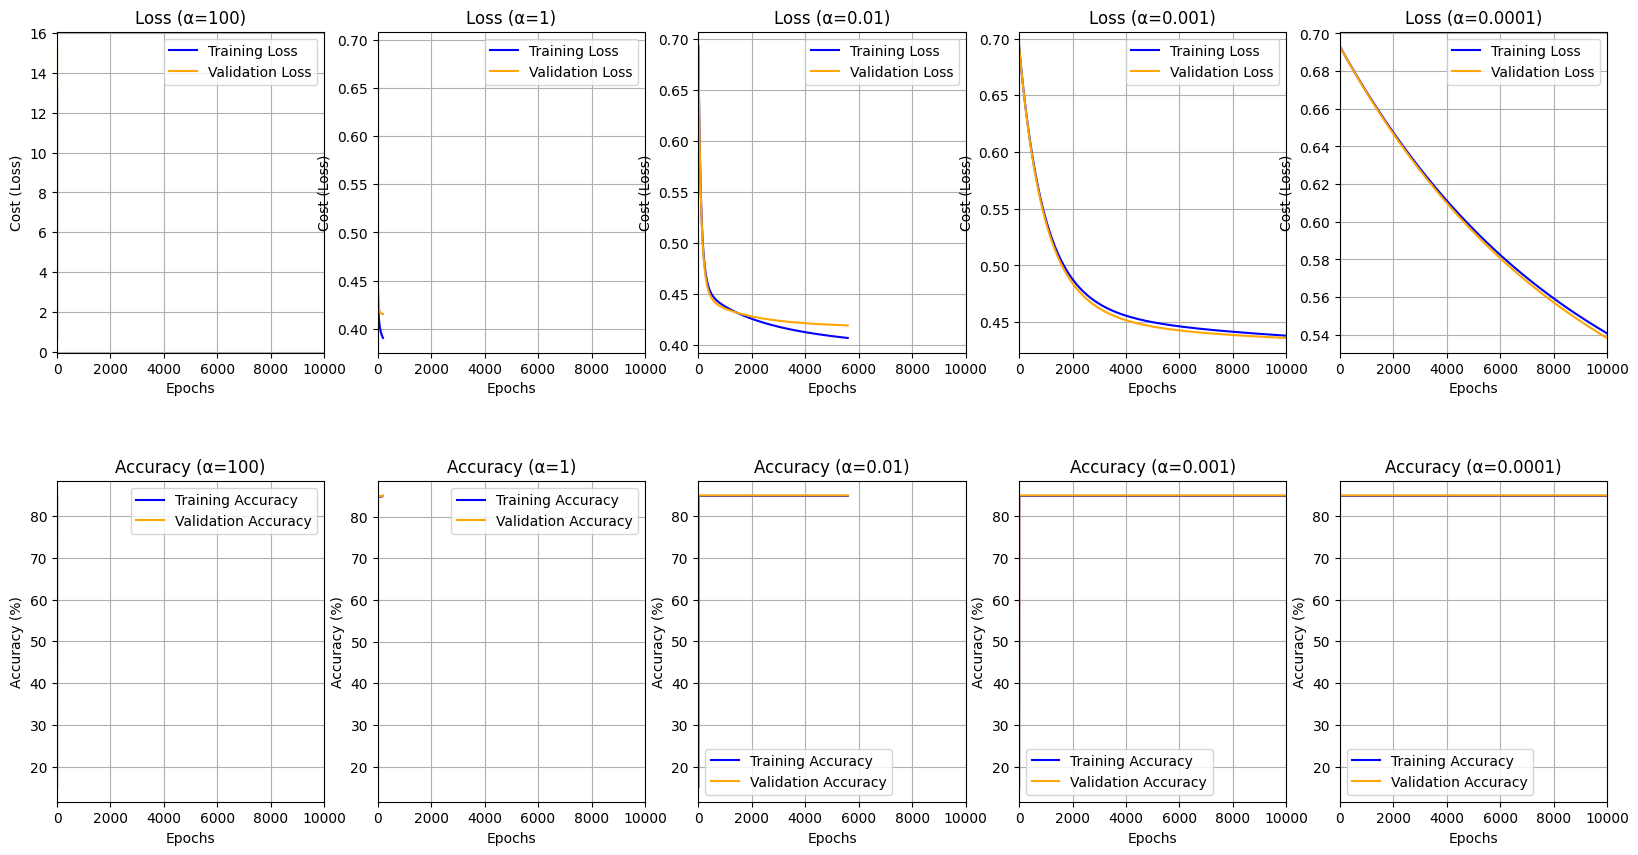

In [73]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
plt.subplots_adjust(hspace=0.4)

total_epochs = 10000

# Plot for each learning rate
for idx, alpha in enumerate(learning_rates):
    num_epochs = len(results[alpha]["J_train"])

    # Plot loss in the top row
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_train"], label=f'Training Loss', color='blue')
    axes[0, idx].plot(range(num_epochs), results[alpha]["J_val"], label=f'Validation Loss', color='orange')
    axes[0, idx].set_title(f'Loss (α={alpha})')
    axes[0, idx].set_xlabel('Epochs')
    axes[0, idx].set_ylabel('Cost (Loss)')
    axes[0, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[0, idx].grid(True)
    axes[0, idx].legend()

    # Plot accuracy in the bottom row
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_train"], label=f'Training Accuracy', color='blue')
    axes[1, idx].plot(range(num_epochs), results[alpha]["accuracy_val"], label=f'Validation Accuracy', color='orange')
    axes[1, idx].set_title(f'Accuracy (α={alpha})')
    axes[1, idx].set_xlabel('Epochs')
    axes[1, idx].set_ylabel('Accuracy (%)')
    axes[1, idx].set_xlim([0, total_epochs])  # Set x-axis limit to total epochs
    axes[1, idx].grid(True)
    axes[1, idx].legend()

plt.show()
